# Installations

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
!pip install scanpy 

  Using cached scanpy-1.9.3-py3-none-any.whl (2.0 MB)
  Using cached anndata-0.8.0-py3-none-any.whl (96 kB)
  Using cached session_info-1.0.0-py3-none-any.whl
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
  Using cached stdlib_list-0.10.0-py3-none-any.whl (79 kB)


In [3]:
!pip install muon

  Using cached muon-0.1.3-py3-none-any.whl (291 kB)
  Using cached mudata-0.2.1-py3-none-any.whl (23 kB)


In [4]:
!pip install RDKit
!pip install pybel
!pip install PyBioMed

  Using cached rdkit-2023.3.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.5 MB)
  Using cached pybel-0.15.5-py3-none-any.whl (387 kB)
  Using cached pystow-0.5.4-py3-none-any.whl (32 kB)
  Using cached ratelimit-2.2.1-py3-none-any.whl
  Using cached psycopg2_binary-2.9.9-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached bel_resources-0.0.3-py3-none-any.whl (17 kB)
  Using cached more_itertools-9.1.0-py3-none-any.whl (54 kB)
  Using cached requests_file-2.1.0-py2.py3-none-any.whl (4.2 kB)
  Using cached pickle5-0.0.12-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (256 kB)
  Using cached bioregistry-0.9.62-py3-none-any.whl (7.9 MB)
  Using cached multisplitby-0.0.1-py3-none-any.whl (4.0 kB)
  Using cached more_click-0.1.2-py3-none-any.whl (6.7 kB)
  Using cached curies-0.5.5-py3-none-any.whl (28 kB)
  Using cached PyTrie-0.4.0-py3-none-any.whl (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 29.8 MB/s eta 0:00:0

In [5]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00a 0:00:01


In [6]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 39.2 MB/s eta 0:00:0000:0100:01


In [7]:
!pip install --user magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.5 MB/s eta 0:00:00a 0:00:01


# Choosing dataset and creating adata object

In [8]:
import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np
import anndata as ad
import muon as mu

'''def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text'''

# Load the data
adata1 = mu.read_10x_h5("/kaggle/input/gsm4929081/GSM4929081_B1_10xlane1_RNA_filtered_feature_bc_matrix.h5")
adata2 = mu.read_10x_h5("/kaggle/input/gsm4929081/GSM4929082_B1_10xlane2_RNA_filtered_feature_bc_matrix.h5")
adata3 = mu.read_10x_h5("/kaggle/input/gsm4929081/GSM4929083_B1_10xlane3_RNA_filtered_feature_bc_matrix.h5")

adata1.obs['batch']="batch1"
adata2.obs['batch']="batch2"
adata3.obs['batch']="batch3"

adata_rna_list=[]
adata_prot_list=[]

for a in [adata1, adata2, adata3]:
    adata_rna_list.append(a.mod['rna'])
    adata_prot_list.append(a.mod['prot'])
    a.mod['rna'].var_names_make_unique()
    a.mod['prot'].var_names_make_unique()
    
adata_rna = ad.concat(adata_rna_list, index_unique="-", keys=["b1", "b2", "b3"])
adata_prot = ad.concat(adata_prot_list, index_unique="-", keys=["b1", "b2", "b3"])

adata_rna.var_names_make_unique()
adata_rna.obs_names_make_unique()

adata_prot.var_names_make_unique()
adata_prot.obs_names_make_unique()

adata=mu.MuData({"rna": adata_rna, "prot": adata_prot})

# Extract the RNA and protein modalities
#adata_rna = adata.mod['rna']
#adata_prot = adata.mod['prot']
rna_prefix='rna:'
prot_prefix='prot:'

'''# Remove prefixes from var names in RNA modality
adata_rna.var.index = [remove_prefix(var, "rna:") for var in adata_rna.var.index]
adata_rna.obs.index = [remove_prefix(obs, "rna:") for obs in adata_rna.obs.index]

# Remove prefixes from var names in protein modality
adata_prot.var.index = [remove_prefix(var, "prot:") for var in adata_prot.var.index]
adata_prot.obs.index = [remove_prefix(obs, "prot:") for obs in adata_prot.obs.index]'''

# Display the modified var names for verification
print("RNA modality var names:")
print(adata_rna.var.index[:10])  # Display the first 10 for brevity
print("\nProtein modality var names:")
print(adata_prot.var.index[:10])  # Display the first 10 for brevity

isLogged=False # flag to prevent applying log scale twice
adata_rna

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/conda/lib/python3.7/site-packages/mudata/_core/mudata.py:447: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  f"{attr}_names are not unique. To make them unique, call `.{attr}_names_make_unique`."
/opt/conda/lib/python3.7/site-packages/mudata/_core/mudata.py:459: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  f"Cannot join columns with the same name because {attr}_names are intersecting."


RNA modality var names:
Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10'],
      dtype='object')

Protein modality var names:
Index(['HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9',
       'HTO10'],
      dtype='object')


AnnData object with n_obs × n_vars = 90000 × 32738

In [9]:
'''adata_rna.obs.index = [remove_prefix(obs, "rna:") for obs in adata_rna.obs.index]
adata_prot.obs.index = [remove_prefix(obs, "prot:") for obs in adata_prot.obs.index]'''

'adata_rna.obs.index = [remove_prefix(obs, "rna:") for obs in adata_rna.obs.index]\nadata_prot.obs.index = [remove_prefix(obs, "prot:") for obs in adata_prot.obs.index]'

## Checking genes in common between prots and rna

In [10]:
def intersection(lst1, lst2, prefix1=rna_prefix, prefix2=prot_prefix):
    lst1=list(lst1)
    lst2=list(lst2)
    
    # Strip prefixes from the elements in both lists
    stripped_lst1 = [value[len(prefix1):] if str(value).startswith(prefix1) else value for value in lst1]
    stripped_lst2 = [value[len(prefix2):] if str(value).startswith(prefix2) else value for value in lst2]
    
    # Find the intersection of the stripped lists
    common_elements = set(stripped_lst1).intersection(stripped_lst2)
    
    return common_elements

print(intersection(adata.mod['rna'].var.index, adata.mod['prot'].var.index))
#print(aCaptures)
#print(genes)

{'CD83', 'CD274', 'CD207', 'CD19', 'CD28', 'TIGIT', 'CD101', 'CD40', 'CD27', 'NLRP2', 'CD52', 'CD99', 'KLRG1', 'CD69', 'CD226', 'CD70', 'CLEC12A', 'CD33', 'CD38', 'CD96', 'CD22', 'CD86', 'CD34', 'CD2', 'CD7', 'CD244', 'HLA-F', 'CD44', 'CD47', 'CD163', 'CD36', 'CD209', 'CD82', 'CD5', 'XCR1', 'CD81', 'CX3CR1', 'CD4', 'CD14', 'CD80', 'CD58'}


# Preprocessing

### Unprocessed violin plots

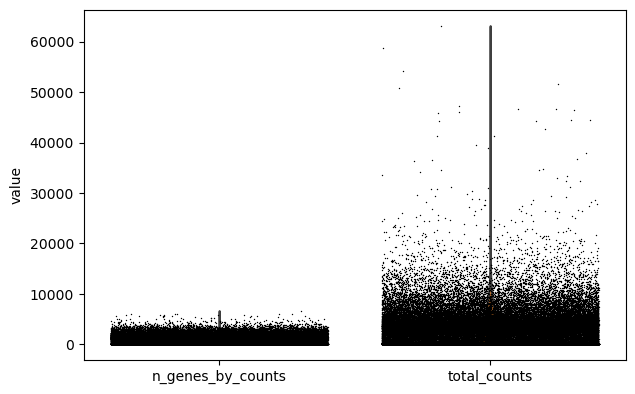

In [11]:
# mitochondrial genes
adata_rna.var["mt"] = adata_rna.var_names.str.startswith("MT-")
# ribosomal genes
adata_rna.var["ribo"] = adata_rna.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata_rna.var["hb"] = adata_rna.var_names.str.contains(("^HB[^(P)]"))

sc.pp.calculate_qc_metrics(adata_rna, inplace=True)
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=["mt","ribo", "hb"], inplace=True, percent_top=[20])
#adata.var_names_make_unique()
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts'], jitter=0.4)

## Filtering out dead cells

In [12]:
'''import scipy.stats as stats

#https://www.sc-best-practices.org/preprocessing_visualization/quality_control.html
def is_outlier(a, metric: str, nmads: int):
    M = a.obs[metric]
    outlier = (M < np.median(M) - nmads * stats.median_abs_deviation(M)) | (
        np.median(M) + nmads * stats.median_abs_deviation(M) < M
    )
    return outlier
adata_rna.obs["outlier"] = (
    is_outlier(adata_rna, "log1p_total_counts", 5)
    | is_outlier(adata_rna, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata_rna, "pct_counts_in_top_20_genes", 5)
)
adata_rna.obs["mt_outlier"] = is_outlier(adata_rna, "pct_counts_mt", 3) | (
    adata_rna.obs["pct_counts_mt"] > 8
)
adata_rna.obs.mt_outlier.value_counts()
adata_rna.obs.outlier.value_counts()
print(f"Total number of cells: {adata_rna.n_obs}")
adata_rna = adata_rna[(~adata_rna.obs.outlier) & (~adata_rna.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata_rna.n_obs}")'''

'import scipy.stats as stats\n\n#https://www.sc-best-practices.org/preprocessing_visualization/quality_control.html\ndef is_outlier(a, metric: str, nmads: int):\n    M = a.obs[metric]\n    outlier = (M < np.median(M) - nmads * stats.median_abs_deviation(M)) | (\n        np.median(M) + nmads * stats.median_abs_deviation(M) < M\n    )\n    return outlier\nadata_rna.obs["outlier"] = (\n    is_outlier(adata_rna, "log1p_total_counts", 5)\n    | is_outlier(adata_rna, "log1p_n_genes_by_counts", 5)\n    | is_outlier(adata_rna, "pct_counts_in_top_20_genes", 5)\n)\nadata_rna.obs["mt_outlier"] = is_outlier(adata_rna, "pct_counts_mt", 3) | (\n    adata_rna.obs["pct_counts_mt"] > 8\n)\nadata_rna.obs.mt_outlier.value_counts()\nadata_rna.obs.outlier.value_counts()\nprint(f"Total number of cells: {adata_rna.n_obs}")\nadata_rna = adata_rna[(~adata_rna.obs.outlier) & (~adata_rna.obs.mt_outlier)].copy()\n\nprint(f"Number of cells after filtering of low quality cells: {adata_rna.n_obs}")'

## Filtering, normalization, scaling, and layering

In [13]:
import scanpy.external as sce

'''# for exporting signature matrix
sc.pp.filter_cells(data=adata_rna, min_counts=3, inplace=True)
#sc.pp.filter_cells(data=adata, max_counts=25000, inplace=True)
sc.pp.filter_cells(data=adata_rna, min_genes=200, inplace=True)
sc.pp.filter_cells(data=adata_rna, max_genes=2500, inplace=True)'''

##mu.pp.filter_obs(adata_rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 2500))

##mu.pp.filter_obs(adata_rna, 'total_counts', lambda x: (x > 1500) & (x < 15000))
#mu.pp.filter_obs(adata_rna, 'pct_counts_mt', lambda x: x < 20)

# Define filtering criteria
rna_filter_criteria = (adata['rna'].obs['n_genes_by_counts'] > 200) & (adata['rna'].obs['n_genes_by_counts'] < 2500) & (adata['rna'].obs['total_counts'] > 3)
filtered_indices = adata['rna'].obs[rna_filter_criteria].index
adata_filtered = adata[filtered_indices, :]
adata_rna=adata_filtered.mod['rna']
adata_prot=adata_filtered.mod['prot']

'''# imputation
sce.pp.magic(adata_rna, name_list='all_genes', knn=5)'''

# Apply filters to adata_rna
'''rna_filtered_indices = adata_rna.obs.index[(adata_rna.obs['n_genes_by_counts'] >= 200) & 
                                           (adata_rna.obs['n_genes_by_counts'] < 2500) & 
                                           (adata_rna.obs['total_counts'] > 3)]

adata_rna = adata_rna[rna_filtered_indices]
adata_prot = adata_prot[rna_filtered_indices]'''

print("Number of observations in adata_rna_filtered:", adata_filtered.mod['rna'].n_obs)
print("Number of observations in adata_prot_filtered:", adata_filtered.mod['prot'].n_obs)

if(isLogged==True):
    print("Data is already logged. Did not perform scaling and transformation again.")
        
else:
    adata_rna.layers["pre_norm"]=adata_rna.X.copy()
    adata_prot.layers["pre_norm"]=adata_prot.X.copy()
    
    sc.pp.normalize_total(adata_rna, target_sum=1e4) # no point in normalizing prot (right?)

    adata_rna.layers["pre_log"]=adata_rna.X.copy()
    adata_prot.layers["pre_log"]=adata_prot.X.copy()

    sc.pp.log1p(adata_rna)
    sc.pp.log1p(adata_prot) # is this necessary?
    isLogged=True
    sce.pp.magic(adata_rna, name_list='all_genes', knn=5, copy=False)
    # Ensure both modalities have the same cell barcodes
    common_barcodes = adata_rna.obs.index.intersection(adata_prot.obs.index)
    adata_rna = adata_rna[common_barcodes, :]
    adata_prot = adata_prot[common_barcodes, :]

    #
    sc.pp.calculate_qc_metrics(adata_rna, inplace=True)
    #sc.pp.calculate_qc_metrics(adata_prot, inplace=True)
    #adata_rna.var_names_make_unique() # necessary?
    #adata_prot.var_names_make_unique() # necessary?
    #display(adata_rna.to_df().describe())
    

Number of observations in adata_rna_filtered: 39625
Number of observations in adata_prot_filtered: 39625


/root/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


  Running MAGIC with `solver='exact'` on 32738-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/root/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)
/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


### Post processing violin plots

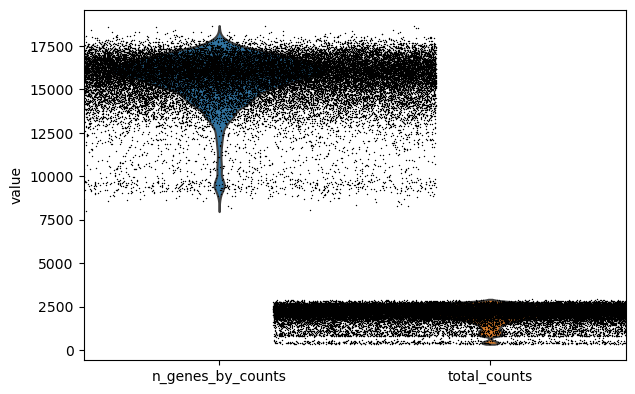

In [14]:
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts'], jitter=0.8)

In [15]:
'''print(len(set(adata.obs.index)))
adata.obs_names_make_unique()
adata.obs['barcodes']'''

"print(len(set(adata.obs.index)))\nadata.obs_names_make_unique()\nadata.obs['barcodes']"

In [19]:
sc.pp.highly_variable_genes(adata_rna)
adata_rna.var[adata_rna.var.highly_variable]
adata_rna.var

KeyError: 'base'

## Save adata objects

In [16]:
adata_rna.write('adata_rna_filtered.h5ad')
adata_prot.write('adata_prot_filtered.h5ad')

# Checkpoint

In [1]:
!pip install scanpy 
!pip install muon
!pip install RDKit
!pip install pybel
!pip install PyBioMed
!pip install leidenalg
!pip install celltypist

In [2]:
import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np
import anndata as ad
import muon as mu
import matplotlib as plt

In [3]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [4]:
adata_rna = ad.read('/kaggle/working/adata_rna_filtered.h5ad')
adata_prot = ad.read('/kaggle/working/adata_prot_filtered.h5ad')

In [5]:
rna_prefix=""
prot_prefix=""

In [6]:
def intersection(lst1, lst2, prefix1=rna_prefix, prefix2=prot_prefix):
    lst1=list(lst1)
    lst2=list(lst2)
    
    # Strip prefixes from the elements in both lists
    stripped_lst1 = [value[len(prefix1):] if str(value).startswith(prefix1) else value for value in lst1]
    stripped_lst2 = [value[len(prefix2):] if str(value).startswith(prefix2) else value for value in lst2]
    
    # Find the intersection of the stripped lists
    common_elements = set(stripped_lst1).intersection(stripped_lst2)
    
    return common_elements
adata=mu.MuData({"rna": adata_rna, "prot": adata_prot})

prots=list(intersection(adata_rna.var.index, adata_prot.var.index))
print(prots)
print(len(prots))

['CD22', 'CD33', 'CD81', 'CD80', 'CD101', 'CD38', 'CD226', 'CD2', 'CD40', 'CD14', 'CD28', 'TIGIT', 'CD96', 'CD82', 'CD274', 'CD70', 'CD86', 'CD207', 'CD244', 'CD99', 'CX3CR1', 'CD4', 'CD36', 'XCR1', 'CD19', 'KLRG1', 'NLRP2', 'CD7', 'CD27', 'CD34', 'CD83', 'CD209', 'CD47', 'CD52', 'CD69', 'CD163', 'CD5', 'CD44', 'HLA-F', 'CLEC12A', 'CD58']
41


/opt/conda/lib/python3.7/site-packages/mudata/_core/mudata.py:459: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  f"Cannot join columns with the same name because {attr}_names are intersecting."


# Determining cell types

In [7]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [8]:
import celltypist

# Remove prefixes from var names in RNA modality
adata_rna_copy = adata_rna.copy()
adata_rna_copy.var.index = [remove_prefix(var, "rna:") for var in adata_rna_copy.var.index]
#adata_rna.obs.index = [remove_prefix(obs, "rna:") for obs in adata_rna.obs.index]

model = celltypist.models.Model.load(model = 'Healthy_COVID19_PBMC.pkl')
predictions=celltypist.annotate(adata_rna_copy, model=model, majority_voting=True)
#adata.obs_names_make_unique()
adata_rna.obs["cell_type"]=predictions.predicted_labels["majority_voting"]
adata_prot.obs["cell_type"]=predictions.predicted_labels["majority_voting"]


# Unsupervised clustering

In [12]:
adata_rna.raw

In [20]:
adata.raw=adata
#adata_rna=adata_rna[:, adata_rna.var.highly_variable]
sc.pp.regress_out(adata_rna, ['total_counts'])
sc.pp.scale(adata_rna,max_value=10)
sc.tl.pca(adata_rna, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_rna,log=True)

KeyboardInterrupt: 

In [ ]:
#counts_df=pd.DataFrame(adata_rna.layers["pre_log"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)

## UMAP

In [ ]:
sc.pp.neighbors(adata_rna, n_neighbors=10, n_pcs=24)
sc.tl.umap(adata_rna)
sc.pl.umap(adata_rna)
sc.tl.leiden(adata_rna, resolution=0.5)
sc.pl.umap(adata_rna, color=['leiden'])
sc.pl.umap(adata_rna, color=['cell_type'])

## If you wanna go with unsupervised clustering and not CellTypist

In [ ]:
'''adata_rna.obs["cell_type"]=adata_rna.obs["leiden"]'''

## To undo

In [ ]:
'''adata_rna.obs["cell_type"]=predictions.predicted_labels["majority_voting"]
adata_prot.obs["cell_type"]=predictions.predicted_labels["majority_voting"]'''

# Gene rankings per cluster

In [ ]:
'''sc.tl.rank_genes_groups(adata_rna, 'cell_type', method="wilcoxon")
sc.pl.rank_genes_groups(adata_rna, n_genes=25, sharey=False)'''

## Rename adata_prot columns to reflect approved gene names

### To undo index changes

In [ ]:
'''adata_prot.var.index=adata.mod["prot"].var.index'''

# Renaming protein columns to corresponding genes

In [ ]:
adata_rna.var

In [ ]:
prot_prefix=""
rna_prefix=""

In [14]:
antigens_df=pd.read_excel("/kaggle/input/hcdm-cd-antigens/HCDM_CD_Antigens.xlsx", index_col = 0)

antigens=list(adata_prot.var.index) 

# create lookup table
cd_lookup=pd.DataFrame({"Gene": np.nan}, index=antigens)

for antigen in cd_lookup.index:
    if(antigen in antigens_df.index):
        cd_lookup.loc[antigen]=antigens_df.loc[antigen, "NCBI Name"]
    else:
        for row in antigens_df.index:
            try:
                other_names=antigens_df.loc[row,"NCBI Other Name"].split("; ")
            except:
                pass

            #print(other_names)
            if(antigen in other_names):
                i=other_names.index(antigen)
                cd_lookup.loc[antigen]=antigens_df.loc[row,"NCBI Name"]
                break

display(cd_lookup.head(30))
print(cd_lookup["Gene"].isna().sum())
new_index=[]
for idx in cd_lookup.index:
    if type(cd_lookup.loc[idx, "Gene"])==float: # if nan
        new_index.append(prot_prefix+idx)
    elif ", " in  cd_lookup.loc[idx, "Gene"]:
        new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"].split(", ")[0])
    else:
        new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"])

adata_prot.var.index=new_index
adata_prot.var

,Gene
HTO1,NaN
HTO2,NaN
HTO3,NaN
HTO4,NaN
HTO5,NaN
HTO6,NaN
HTO7,NaN
HTO8,NaN
HTO9,NaN
HTO10,NaN


57


""
HTO1
HTO2
HTO3
HTO4
HTO5
...
Podocalyxin
GGT1
c-Met
TNFSF14


### Create an Excel sheet to manually fill gene names not found with the HCDM dataset

In [15]:
in_rna=[]
in_rna2=[]
cd_lookup_copy=cd_lookup.copy()
cd_lookup_copy["New Index"]=new_index
for gene in cd_lookup_copy["New Index"].values:
    if gene in adata_rna.var.index:
        in_rna.append(True)
    else:
        in_rna.append(False)
for gene in cd_lookup_copy.index.values:        
    if "rna:"+gene in adata_rna.var.index:
        in_rna2.append(True)
    else:
        in_rna2.append(False)

cd_lookup_copy["in RNA"]=in_rna
cd_lookup_copy["in RNA originally"]=in_rna2

display(cd_lookup_copy.describe())
cd_lookup_copy.to_excel("cd_lookup_table.xlsx")

,Gene,New Index,in RNA,in RNA originally
count,145,202,202,202
unique,143,200,2,1
top,PTPRC,PTPRC,True,False
freq,3,3,140,202


## After manual modifications, redo the operation

In [16]:
antigens_df=pd.read_excel("/kaggle/input/hcdm-cd-antigens/HCDM_CD_Antigens.xlsx", index_col = 0)
manual_df=pd.read_excel("/kaggle/input/manual-modifications-to-cd-lookup-table/cd_lookup_table_manual_modifs.xlsx", index_col=0)
manually_added=list(manual_df["Manually Added"])

antigens=list(adata_prot.var.index)  

# create lookup table
cd_lookup=pd.DataFrame({"Gene": np.nan}, index=antigens)

for antigen in cd_lookup.index:
    if(antigen in antigens_df.index):
        cd_lookup.loc[antigen]=antigens_df.loc[antigen, "NCBI Name"]
    else:
        for row in antigens_df.index:
            try:
                other_names=antigens_df.loc[row,"NCBI Other Name"].split("; ")
            except:
                pass

            #print(other_names)
            if(antigen in other_names):
                i=other_names.index(antigen)
                cd_lookup.loc[antigen]=antigens_df.loc[row,"NCBI Name"]
                break

display(cd_lookup.head(30))
print(cd_lookup["Gene"].isna().sum())
new_index=[]

for i, idx in enumerate(cd_lookup.index):
    if type(manually_added[i])!=float:
        if("," in manually_added[i]):
            new_index.append(prot_prefix+manually_added[i].split(",")[0])
        else:
            new_index.append(prot_prefix+manually_added[i])
    elif type(cd_lookup.loc[idx, "Gene"])==float: # if nan
        new_index.append(prot_prefix+idx)
    elif ", " in  cd_lookup.loc[idx, "Gene"]:
        new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"].split(", ")[0])
    else:
        if(type(cd_lookup.loc[idx, "Gene"])!=str):
            if(type(cd_lookup.loc[idx, "Gene"].values[0])!=float): # if not nan
                new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"].values[0])
            else: # if nan
                new_index.append(prot_prefix+idx)
        else:
            new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"])

adata_prot.var.index=new_index
adata_prot.var



,Gene
HTO1,NaN
HTO2,NaN
HTO3,NaN
HTO4,NaN
HTO5,NaN
HTO6,NaN
HTO7,NaN
HTO8,NaN
HTO9,NaN
HTO10,NaN


159


""
HTO1
HTO2
HTO3
HTO4
HTO5
...
PODXL
GGT1
MET
TNFSF14


In [ ]:
'''import pandas as pd
modif_cd_lookup=pd.read_excel("/kaggle/input/manual-modifications-to-cd-lookup-table/cd_lookup_table_manual_modifs.xlsx", index_col=0)
new_index=[]

for idx in cd_lookup.index:
    if type(cd_lookup.loc[idx, "Gene"])==float: # if nan
        new_index.append(prot_prefix+idx)
    elif ", " in  cd_lookup.loc[idx, "Gene"]:
        new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"].split(", ")[0])
    else:
        new_index.append(prot_prefix+ cd_lookup.loc[idx, "Gene"])

adata_prot.var.index=new_index
adata_prot.var'''

## Re-determine common genes between antigen capture and RNA sequencing

In [17]:
#prots=list(adata_prot.var.index)
prots=list(intersection(adata_rna.var.index, adata_prot.var.index))
print(prots)
print(len(prots))

['FASLG', 'LRRC32', 'CXCR4', 'LAG3', 'CR1', 'NCR2', 'CD2', 'ITGAX', 'CD14', 'ICOS', 'CEACAM8', 'NCR3', 'LAIR1', 'ITGA6', 'LAMP1', 'CD86', 'CLEC9A', 'CD207', 'CD244', 'BTLA', 'CD36', 'TNFRSF18', 'FCRL5', 'TNFRSF8', 'CD7', 'CD1D', 'CEACAM1', 'FCGBP', 'FCGR1A', 'KLRD1', 'LILRB1', 'TNFRSF13B', 'THY1', 'IL21R', 'CD163', 'TFRC', 'CRLF2', 'KLRB1', 'NCAM1', 'ITGB2', 'KIT', 'TNFRSF17', 'CD22', 'PTPRC', 'CCR5', 'CDH5', 'LGALS3', 'CD40', 'MSR1', 'CD28', 'HAVCR2', 'HLA-A', 'SDC1', 'ITGB1', 'CCR4', 'CD82', 'CD1A', 'SELL', 'PODXL', 'ICOSLG', 'PTCRA', 'CD99', 'CX3CR1', 'KDR', 'CD19', 'CCR7', 'TNFRSF13C', 'KLRG1', 'KIR3DL3', 'PDPN', 'CD3D', 'ITGAL', 'FCER2', 'CD83', 'CD209', 'CDH1', 'MCAM', 'CD47', 'CCR6', 'CLEC4C', 'DPP4', 'CCR3', 'VTCN1', 'TNFSF14', 'FAS', 'KIR3DL1', 'PVRL2', 'IL3RA', 'CD81', 'GGT1', 'CD38', 'GYPA', 'CD226', 'IL2RA', 'THBD', 'CD79B', 'CD96', 'PDCD1', 'KLRK1', 'TNFSF4', 'KIR2DL3', 'TNFRSF9', 'ITGA4', 'PROM1', 'XCR1', 'FCRL4', 'SIGLEC7', 'CD1C', 'FCGR2B', 'NLRP2', 'CD8A', 'TNFSF11', '

## Save adata objects

In [18]:
adata_rna.write('adata_rna_relabeled.h5ad')
adata_prot.write('adata_prot_relabeled.h5ad')


# Checkpoint

In [2]:
!pip install scanpy 
!pip install muon
#!pip install RDKit
#!pip install pybel
#!pip install PyBioMed

In [3]:
import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np
import anndata as ad
import muon as mu
import matplotlib as plt

In [4]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [5]:
adata_rna = ad.read('/kaggle/working/adata_rna_relabeled.h5ad')
adata_prot = ad.read('/kaggle/working/adata_prot_relabeled.h5ad')

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
rna_prefix=""
prot_prefix=""

In [22]:
def intersection(lst1, lst2, prefix1=rna_prefix, prefix2=prot_prefix):
    lst1=list(lst1)
    lst2=list(lst2)
    
    # Strip prefixes from the elements in both lists
    stripped_lst1 = [value[len(prefix1):] if str(value).startswith(prefix1) else value for value in lst1]
    stripped_lst2 = [value[len(prefix2):] if str(value).startswith(prefix2) else value for value in lst2]
    
    # Find the intersection of the stripped lists
    common_elements = set(stripped_lst1).intersection(stripped_lst2)
    
    return common_elements
adata=mu.MuData({"rna": adata_rna, "prot": adata_prot})

prots=list(intersection(adata_rna.var.index, adata_prot.var.index))
prots=list(set(prots))
print(prots)
print(len(prots))

['CLEC12A', 'CX3CR1', 'ICOS', 'ITGA6', 'CD8A', 'TNFSF11', 'FCGBP', 'KIR3DL1', 'CD1D', 'PTCRA', 'HAVCR2', 'ICOSLG', 'PODXL', 'PDPN', 'CD28', 'LGALS3', 'BTLA', 'CCR6', 'MME', 'KLRD1', 'PTPRC', 'TNFSF4', 'FCGR3A', 'VCAM1', 'ITGA2', 'CD209', 'PROM1', 'PVR', 'CD244', 'TNFSF14', 'SLAMF1', 'CD14', 'NCR3', 'MRC1', 'FCRL5', 'ITGB2', 'NLRP2', 'MCAM', 'ITGAX', 'IL7R', 'CDH1', 'CD81', 'CCR5', 'NCR1', 'SELP', 'CD83', 'CD40LG', 'CD79B', 'CLEC9A', 'LAIR1', 'CD3D', 'ENTPD1', 'FCGR2B', 'KIT', 'THY1', 'CR1', 'CD163', 'TNFRSF8', 'CD226', 'LAG3', 'KLRK1', 'CD36', 'CD80', 'ITGAM', 'NCR2', 'IL2RB', 'CD40', 'ITGAE', 'CR2', 'SLC3A2', 'XCR1', 'CD4', 'HLA-A', 'ITGB1', 'LILRB1', 'NCAM1', 'CCR3', 'NRP1', 'FAS', 'CD5L', 'CD34', 'CD7', 'CD22', 'TNFRSF13B', 'CD69', 'FUT4', 'TNFSF13B', 'CD33', 'LRRC32', 'KLRG1', 'MET', 'CLEC4C', 'CD44', 'CD207', 'FCGR1A', 'HLA-F', 'CD5', 'CD99', 'THBD', 'LAMP1', 'TFRC', 'PDCD1LG2', 'CD47', 'CD38', 'IL21R', 'CD86', 'FCRL4', 'MSR1', 'CD58', 'CD1A', 'CEACAM8', 'ITGA2B', 'GYPA', 'SDC1', 

### This function gives row and column indicies for subplots

In [9]:
def orgMyPlots(subPlotsCount, columns=3):
    rows=np.ceil(float(subPlotsCount)/columns)
    x_ind=[]
    y_ind=[]
    
    for i in range(subPlotsCount):
        x_ind.append(i%columns)
        y_ind.append(int(np.floor(i/columns)))
    return x_ind, y_ind

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def create_transcript_protein_df(adata, prot_name):
    # Construct keys for RNA and protein
    '''rna_key = rna_prefix + prot_name
    prot_key = prot_prefix + prot_name'''
    
    rna_key=prot_name
    prot_key=prot_name
    
    # Check if the keys exist in the RNA and protein data
    if rna_key not in adata_rna.var.index or prot_key not in adata_prot.var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
    '''    
    # Get DataFrames for RNA and protein data
    #rna_df = adata_rna.to_df()
    #prot_df = adata_prot.to_df()
    
    adata_rna_copy = adata_rna.copy()
    adata_rna_copy.var.index = [remove_prefix(var, rna_prefix) for var in adata_rna.var.index]
    adata_rna_copy.obs.index = [remove_prefix(obs, rna_prefix) for obs in adata_rna.obs.index]

    adata_prot_copy = adata_prot.copy()
    adata_prot_copy.var.index = [remove_prefix(var, prot_prefix) for var in adata_prot.var.index]
    adata_prot_copy.obs.index = [remove_prefix(obs, prot_prefix) for obs in adata_prot.obs.index]'''
    
    rna_df=adata_rna.to_df()
    prot_df=adata_prot.to_df()
    #rna_df=pd.DataFrame(adata_rna.layers["pre_norm"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)
    #prot_df=pd.DataFrame(adata_prot.layers["pre_norm"].toarray(), index=adata_prot.obs_names, columns=adata_prot.var_names)

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        
        # Append transcript value from RNA data
        try:
            transcripts.append(rna_df.loc[cell, rna_key].values[0])
        except:
            transcripts.append(rna_df.loc[cell, rna_key])
        
        # Append protein value from protein data if cell exists in prot_df
        prot_cell=cell
        if prot_cell in prot_df.index:
            try:
                protAmounts.append(prot_df.loc[prot_cell, prot_key].values[0])
            except:
                protAmounts.append(prot_df.loc[prot_cell, prot_key])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

,Transcripts,Proteins
count,39625.000000,39625.000000
mean,0.026026,1.729638
std,0.050820,0.598236
min,0.000000,0.000000
25%,0.000066,1.386294
50%,0.000894,1.791759
75%,0.029726,2.079442
max,0.437714,9.097283


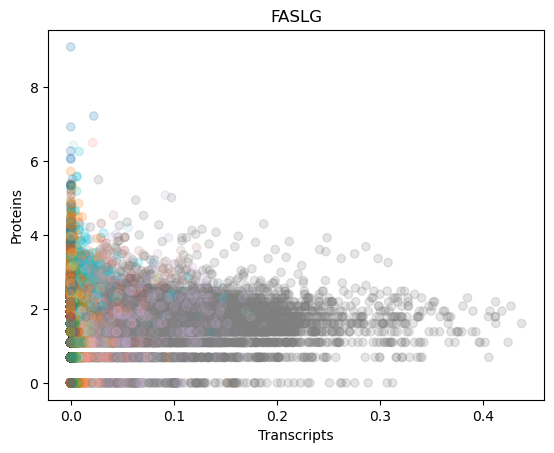

,Transcripts,Proteins
count,39625.000000,39625.000000
mean,0.001401,0.993948
std,0.004302,0.686159
min,0.000000,0.000000
25%,0.000000,0.693147
50%,0.000112,1.098612
75%,0.000882,1.386294
max,0.142156,7.256297


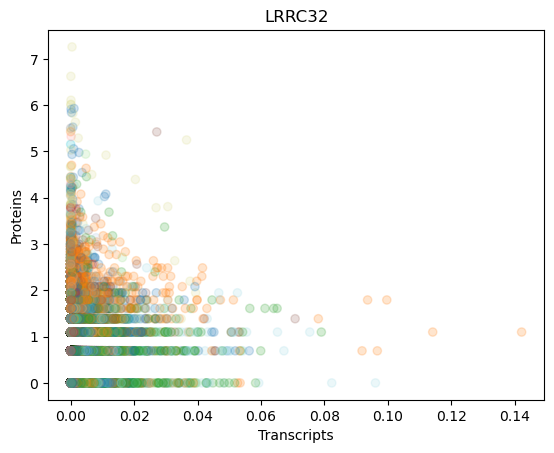

,Transcripts,Proteins
count,39625.000000,39625.000000
mean,1.572534,1.520312
std,0.811165,0.641422
min,0.061136,0.000000
25%,0.907058,1.098612
50%,1.593508,1.609438
75%,2.287151,1.945910
max,3.345505,7.334982


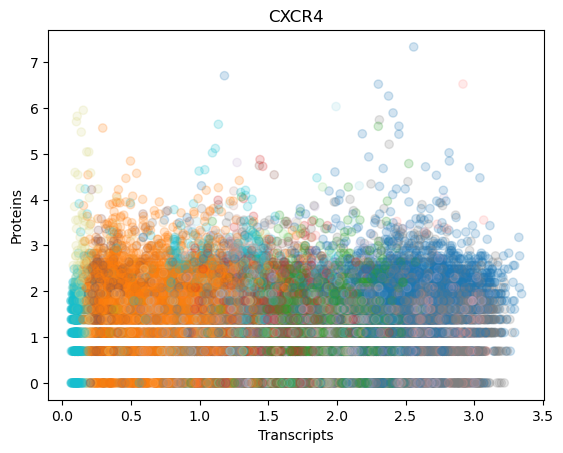

,Transcripts,Proteins
count,39625.000000,39625.000000
mean,0.083877,2.351275
std,0.174604,0.579035
min,0.000000,0.000000
25%,0.002377,2.079442
50%,0.016234,2.302585
75%,0.070140,2.639057
max,1.965583,9.186867


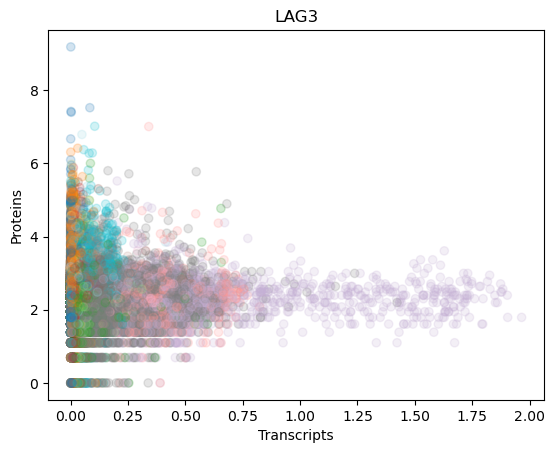

,Transcripts,Proteins
count,39625.000000,39625.000000
mean,0.047478,2.601324
std,0.059868,1.439769
min,0.000000,0.000000
25%,0.004015,1.386294
50%,0.021466,2.197225
75%,0.072086,3.784190
max,0.457461,7.357556


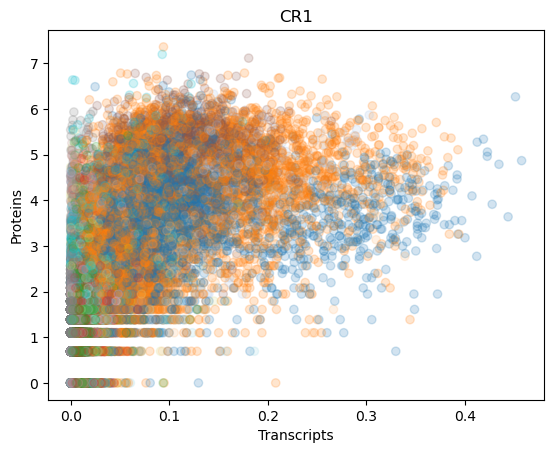

KeyboardInterrupt: 

In [27]:
# Usage example:
#prot = "CD88"
for prot in prots:
    try:
        df = create_transcript_protein_df(adata, prot)
        df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)

        # Filter out rows with zero transcript values
        #df = df.loc[df["Transcripts"] != 0].copy()

        display(df.describe())
        #for i in range(len(df["Transcripts"])):
            #print(type(df["Transcripts"][i]))
            #print(type(df["Proteins"][i]))
        plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.2, c=df['cell_type'].cat.codes, cmap='tab20')
        #plt.hist2d(df["Transcripts"], df["Proteins"], bins=[int(df["Transcripts"].max())+1, int(df["Proteins"].max())+1], cmax=40)
        # Optionally, set y-axis to log scale
        #plt.yscale('log')
        #plt.xscale('log')
        plt.xlabel("Transcripts")
        plt.ylabel("Proteins")
        #plt.xlim(0,35)
        #plt.ylim(0,100)
        plt.title(prot)
        plt.show()
    except Exception as e:
        raise (e)


In [ ]:
from sklearn.linear_model import QuantileRegressor
from sklearn.utils.fixes import parse_version, sp_version

prot="CD69"

try:
    df = create_transcript_protein_df(adata, prot)
    df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)

    display(df.describe())
    plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.2,c=df['cell_type'].cat.codes)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.ylim(0,100)
    plt.xlabel("Transcripts")
    plt.ylabel("Proteins")
    plt.title(prot)
except Exception as e:
    raise (e)


'''quantiles = [0.05, 0.5, 0.95]
predictions = {}
#out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    x=np.array(df["Transcripts"]).reshape(-1, 1)
    model = qr.fit(x, df["Proteins"])
    print("hi")
    y_pred = model.predict(x)
    predictions[quantile] = y_pred'''
    

'''
if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )
        
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")
'''
'''for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")
'''
'''plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)
'''
'''plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")
plt.show()'''

,Transcripts,Proteins
count,39625.000000,39625.000000
mean,0.130741,0.800812
std,0.261970,0.815274
min,0.000000,0.000000
25%,0.002687,0.000000
50%,0.006338,0.693147
75%,0.029099,1.098612
max,1.454984,5.030438


0.05
0.5
0.95


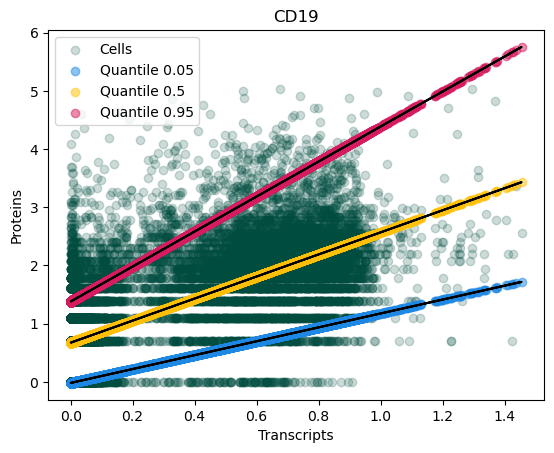

In [29]:
# Python program to visualize quantile regression

# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)

prot="CD19"

try:
    df = create_transcript_protein_df(adata, prot)
    df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)
    display(df.describe())
except Exception as e:
    raise (e)

# Number of rows
quantiles=[0.05, 0.5, 0.95]

# #fit the model

#print(model.summary())

# define figure and axis

# Plotting data points with the help
# pf quantile regression equation
plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.2, color='#004D40', label="Cells")
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,120)
plt.xlabel("Transcripts")
plt.ylabel("Proteins")
plt.title(prot)
q_colors=['#1E88E5', '#FFC107', '#D81B60']
for i, q in enumerate(quantiles):
    print(q)
    model = smf.quantreg('Proteins ~ Transcripts', 
                    df).fit(q=q)
    y_line = lambda a, b: a + df["Transcripts"]*b
    y = y_line(model.params['Intercept'],
        model.params['Transcripts'])
    plt.plot(df["Transcripts"], y, color='black')
    plt.scatter(df["Transcripts"], y, alpha=.5, color=q_colors[i], label="Quantile "+str(q))

# Save the plot
plt.legend()
plt.savefig('quantile_regression.png')


## Save the data

In [ ]:
# Python program to visualize quantile regression

# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)
entries_count_list=[]
all_slopes=[]
all_intercepts=[]
for prot in prots:
    try:
        df = create_transcript_protein_df(adata, prot)
        entries_count_list.append(len(df.loc[df["Transcripts"]!=0].index))
        df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)

        quantiles=[0.05, 0.25, 0.5, 0.75, 0.95]
        quantile_slopes=[]
        quantile_intercepts=[]
        for i, q in enumerate(quantiles):
            model = smf.quantreg('Proteins ~ Transcripts', 
                            df).fit(q=q)
            y_line = lambda a, b: a + df["Transcripts"]*b
            y = y_line(model.params['Intercept'],
                model.params['Transcripts'])
            quantile_slopes.append(model.params["Transcripts"])
            quantile_intercepts.append(model.params["Intercept"])

        all_slopes.append(quantile_slopes)
        all_intercepts.append(quantile_intercepts)
    except Exception as e:
        print(e)
        all_slopes.append(np.nan)
        all_intercepts.append(np.nan)
qRegResults_slopes=pd.DataFrame(all_slopes, columns=[str(quan) + "_slope" for quan in quantiles])
qRegResults_intercepts=pd.DataFrame(all_intercepts, columns=[str(quan) + "_intercept" for quan in quantiles])
qRegResults=pd.concat([qRegResults_slopes,qRegResults_intercepts], axis=1)
#qRegResults["NonZeroEntries"]=entries_count_list
qRegResults.index=prots

display(qRegResults)
qRegResults.to_excel("qRegResults.xlsx")

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [30]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)

# Initialize lists to store results
entries_count_list = []
all_slopes = []
all_intercepts = []

# Iterate over the protein list
for prot in prots:
    try:
        # Create DataFrame for the current protein
        df = create_transcript_protein_df(adata, prot)
        
        # Filter non-zero transcript entries and append the count
        non_zero_entries = len(df[df["Transcripts"] != 0])
        entries_count_list.append(non_zero_entries)

        # Add cell type information to the DataFrame
        df = df.join(adata_rna.obs["cell_type"])

        # Define quantiles and initialize lists to store slopes and intercepts
        quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
        quantile_slopes = []
        quantile_intercepts = []

        # Perform quantile regression for each quantile
        for q in quantiles:
            model = smf.quantreg('Proteins ~ Transcripts', df).fit(q=q)
            quantile_slopes.append(model.params["Transcripts"])
            quantile_intercepts.append(model.params["Intercept"])

        # Append results to the lists
        all_slopes.append(quantile_slopes)
        all_intercepts.append(quantile_intercepts)

    except Exception as e:
        print(e)
        # Append NaN if an error occurs
        all_slopes.append([np.nan] * len(quantiles))
        all_intercepts.append([np.nan] * len(quantiles))

# Create DataFrames for results
qRegResults_slopes = pd.DataFrame(all_slopes, columns=[f"{q}_slope" for q in quantiles])
qRegResults_intercepts = pd.DataFrame(all_intercepts, columns=[f"{q}_intercept" for q in quantiles])

# Combine results into a single DataFrame
qRegResults = pd.concat([qRegResults_slopes, qRegResults_intercepts], axis=1)
qRegResults.index = prots

# Save results to Excel
qRegResults.to_excel("qRegResults.xlsx")

# Display the results
print(qRegResults)


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/

           0.05_slope  0.25_slope  0.5_slope  0.75_slope  0.95_slope  \
CLEC12A  4.139824e+00    4.891123   5.566837    6.764534    7.677775   
CX3CR1   2.145376e-01    0.000021   0.000009    0.070234    0.076993   
ICOS     2.959465e+00    3.245789   3.505518    3.440014    4.082999   
ITGA6    1.979881e+00    2.037232   1.817050    1.506967    0.873009   
CD8A     4.647326e-07    1.397900   1.517555    2.056173    3.235821   
...               ...         ...        ...         ...         ...   
PVRL2    3.636231e+00    3.880543   3.759605    4.401699    4.400985   
FASLG   -1.163357e-06   -0.000005  -0.888529   -0.728457   -1.071212   
OLR1     9.853265e+00    0.000080   8.113667    6.090967    8.122261   
IL3RA    7.552420e-06    2.370710   6.584971    6.900720   10.298366   
ICAM1    2.188239e+00    3.031078   3.329351    3.713837    3.964524   

         0.05_intercept  0.25_intercept  0.5_intercept  0.75_intercept  \
CLEC12A   -5.339014e-02        0.644325       1.059729       

### Box plot

In [ ]:
'''ctr=0
for i in range(0,int(df["Transcripts"].max())+1, 2):
    ctr+=1
print(ctr)'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt

def create_transcript_protein_df(adata, prot_name):
    # Construct keys for RNA and protein
    rna_key = rna_prefix + prot_name
    prot_key = prot_prefix + prot_name
    
    # Check if the keys exist in the RNA and protein data
    if rna_key not in adata_rna.var.index or prot_key not in adata_prot.var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
    
    # Get DataFrames for RNA and protein data
    #rna_df = adata_rna.to_df()
    #prot_df = adata_prot.to_df()
    
    adata_rna_copy = adata_rna.copy()
    adata_rna_copy.var.index = [remove_prefix(var, rna_prefix) for var in adata_rna.var.index]
    adata_rna_copy.obs.index = [remove_prefix(obs, rna_prefix) for obs in adata_rna.obs.index]

    adata_prot_copy = adata_prot.copy()
    adata_prot_copy.var.index = [remove_prefix(var, prot_prefix) for var in adata_prot.var.index]
    adata_prot_copy.obs.index = [remove_prefix(obs, prot_prefix) for obs in adata_prot.obs.index]
    
    rna_df=pd.DataFrame(adata_rna.layers["pre_norm"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)
    prot_df=pd.DataFrame(adata_prot.layers["pre_norm"].toarray(), index=adata_prot.obs_names, columns=adata_prot.var_names)

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        
        # Append transcript value from RNA data
        transcripts.append(rna_df.loc[cell, rna_key])
        
        # Append protein value from protein data if cell exists in prot_df
        prot_cell="prot:"+cell.split('rna:')[1]
        if prot_cell in prot_df.index:
            protAmounts.append(prot_df.loc[prot_cell, prot_key])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

# Usage example:
#prot = "CD88"
for prot in prots:
    try:
        df = create_transcript_protein_df(adata, prot)
        df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)

        # Filter out rows with zero transcript values
        #df = df.loc[df["Transcripts"] != 0].copy()

        display(df.describe())
        boxplots=[]
        for i in range(int(((df["Transcripts"].max())+1)/2)):
            boxplots.append(df.loc[(df["Transcripts"]==i*2)|(df["Transcripts"]==(i*2)+1), "Proteins"].copy())
        print(len(boxplots))
        plt.boxplot(boxplots, showfliers=False, widths=1)
        #plt.hist2d(df["Transcripts"], df["Proteins"], bins=[int(df["Transcripts"].max())+1, int(df["Proteins"].max())+1], cmax=40)
        # Optionally, set y-axis to log scale
        #plt.yscale('log')
        #plt.xscale('log')
        plt.xlabel("Transcript pairs")
        plt.ylabel("Proteins")
        #plt.xlim(0,35)
        #plt.ylim(0,100)
        plt.title(prot)
        plt.show()
    except Exception as e:
        raise (e)
'''

## Inter-cluster RTP differences per gene

### Scatter plot

These are useful because it compares clusters, which are assumed to be similar, rather than cells, among which small transcript differences might be mistakenly detected. If most cell types lie on the same line, that specific protein can be reliably detected using number of transcripts as well as the slope.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

zero_weight = 0.25 # for weighted median
conditional_threshold=0.25 # for conditional non zero median
min_cell_count=1

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)

def mean_df(data, threshold=0.15):
    means = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            means[col] = np.mean(data[col])
        else:
            means[col] = np.nan
    return pd.Series(means)

def median_df(data, threshold=0.15):
    means = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            means[col] = np.median(data[col])
        else:
            means[col] = np.nan
    return pd.Series(means)


# Uses gene counts per 10,000 cells for score calculation

batch_labels = ['-b1', '-b2', '-b3']
# Remove prefixes from var names in RNA modality
adata_rna_copy = adata_rna.copy()
adata_rna_copy.var.index = [remove_prefix(var, rna_prefix) for var in adata_rna.var.index]
adata_rna_copy.obs.index = [remove_prefix(obs, rna_prefix) for obs in adata_rna.obs.index]

adata_prot_copy = adata_prot.copy()
adata_prot_copy.var.index = [remove_prefix(var, prot_prefix) for var in adata_prot.var.index]
adata_prot_copy.obs.index = [remove_prefix(obs, prot_prefix) for obs in adata_prot.obs.index]

averagedMatrix_rna=pd.DataFrame()
averagedMatrix_prot=pd.DataFrame()

rna_c_medians=[]
prot_c_medians=[]
rna_means=[]
prot_means=[]
cellTypeList=[]
protList=[]

for batch in batch_labels:
    cellMatrix_rna = adata_rna_copy[adata_rna.obs.index.str.endswith(batch)].to_df()
    cellMatrix_prot = adata_prot_copy[adata_prot.obs.index.str.endswith(batch)].to_df()
    
    #cellMatrix = pd.concat([pd.DataFrame(adata_rna_copy.layers["pre_norm"].toarray(), index=adata_rna_copy.obs_names, columns=adata_rna_copy.var_names),pd.DataFrame(adata_prot_copy.layers["pre_norm"].toarray(), index=adata_prot_copy.obs_names, columns=adata_prot_copy.var_names)])
    #cellMatrix_rna = adata_rna_copy.to_df()
    #cellMatrix_prot = adata_prot_copy.to_df()

    cellMatrix_rna['cell_type']= adata_rna_copy.obs['cell_type']
    cellMatrix_prot['cell_type']= adata_rna_copy.obs['cell_type']

    cellTypes = list(cellMatrix_rna['cell_type'].unique())

    sums=[]
    for cell_t in cellTypes:
        cellTypeList.append(cell_t+batch)
        temp_df_rna= cellMatrix_rna.loc[cellMatrix_rna['cell_type']==cell_t]
        temp_df_prot= cellMatrix_prot.loc[cellMatrix_prot['cell_type']==cell_t]
        rna_c_medians.append(median_df(temp_df_rna))
        prot_c_medians.append(median_df(temp_df_prot))
        rna_means.append(mean_df(temp_df_rna))
        prot_means.append(mean_df(temp_df_prot))
        
        #display(temp_df_rna)
        #averagedMatrix_rna=averagedMatrix_rna.append(conditional_non_zero_median_df(temp_df_rna), ignore_index=True) # averaging uses conditional non zero median of cell counts
        #display(temp_df_prot)
        #averagedMatrix_prot=averagedMatrix_prot.append(conditional_non_zero_median_df(temp_df_prot), ignore_index=True) # averaging uses conditional non zero median of cell counts
        #sums.append(adata_rna_copy.obs.loc[adata_rna_copy.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
    #averagedMatrix_rna.index=cellTypes
    #averagedMatrix_prot.index=cellTypes
averagedMatrix_rna=pd.DataFrame(rna_c_medians, index=cellTypeList)
averagedMatrix_prot=pd.DataFrame(prot_c_medians, index=cellTypeList)

averagedMatrix_rna_means=pd.DataFrame(rna_means, index=cellTypeList)
averagedMatrix_prot_means=pd.DataFrame(prot_means, index=cellTypeList)

In [11]:
display(averagedMatrix_rna)
display(averagedMatrix_prot)
display(averagedMatrix_rna_means)
display(averagedMatrix_prot_means)

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1,cell_type
CD14_mono-b1,0.0,0.0,0.0,0.000250,0.0,0.048380,0.0,0.0,0.010046,0.001149,...,0.0,0.0,0.001144,0.013252,0.0,0.0,0.0,0.0,0.0,NaN
B_naive-b1,0.0,0.0,0.0,0.001813,0.0,0.000882,0.0,0.0,0.015772,0.001169,...,0.0,0.0,0.004840,0.012491,0.0,0.0,0.0,0.0,0.0,NaN
RBC-b1,0.0,0.0,0.0,0.000000,0.0,0.001576,0.0,0.0,0.004031,0.000000,...,0.0,0.0,0.000000,0.002414,0.0,0.0,0.0,0.0,0.0,NaN
NK_16hi-b1,0.0,0.0,0.0,0.000710,0.0,0.000473,0.0,0.0,0.010339,0.000379,...,0.0,0.0,0.001352,0.009279,0.0,0.0,0.0,0.0,0.0,NaN
CD8.TE-b1,0.0,0.0,0.0,0.000047,0.0,0.000180,0.0,0.0,0.016101,0.000397,...,0.0,0.0,0.000919,0.009859,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAIT-b3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.019420,0.000028,...,0.0,0.0,0.000090,0.002687,0.0,0.0,0.0,0.0,0.0,NaN
CD8.Naive-b3,0.0,0.0,0.0,0.000880,0.0,0.000398,0.0,0.0,0.006028,0.000350,...,0.0,0.0,0.001344,0.004441,0.0,0.0,0.0,0.0,0.0,NaN
NK_56hi-b3,0.0,0.0,0.0,0.000098,0.0,0.000063,0.0,0.0,0.007970,0.000093,...,0.0,0.0,0.000223,0.013518,0.0,0.0,0.0,0.0,0.0,NaN
pDC-b3,0.0,0.0,0.0,0.000000,0.0,0.000514,0.0,0.0,0.006542,0.000000,...,0.0,0.0,0.000149,0.000557,0.0,0.0,0.0,0.0,0.0,NaN


,HTO1,HTO2,HTO3,HTO4,HTO5,HTO6,HTO7,HTO8,HTO9,HTO10,...,IL21R,C5R1,HLA-F,NLRP2,PODXL,GGT1,MET,TNFSF14,DR3,cell_type
CD14_mono-b1,2.079442,2.564949,2.890372,0.0,2.484907,0.0,0.0,0.0,0.0,0.0,...,1.386294,2.708050,1.609438,2.197225,1.098612,2.639057,1.791759,1.386294,1.791759,NaN
B_naive-b1,1.791759,2.302585,2.708050,0.0,2.302585,0.0,0.0,0.0,0.0,0.0,...,1.609438,1.609438,1.609438,2.079442,1.098612,1.609438,1.791759,1.098612,1.791759,NaN
RBC-b1,2.397895,2.833213,2.302585,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,...,1.386294,1.945910,1.609438,2.302585,1.098612,1.791759,1.791759,1.098612,1.791759,NaN
NK_16hi-b1,1.791759,2.197225,2.708050,0.0,1.791759,0.0,0.0,0.0,0.0,0.0,...,1.386294,1.609438,1.386294,1.945910,0.693147,1.386294,1.609438,1.098612,1.609438,NaN
CD8.TE-b1,1.945910,2.302585,3.044523,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,...,1.386294,1.609438,1.609438,1.945910,0.693147,1.791759,1.609438,1.098612,1.609438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAIT-b3,1.791759,2.564949,1.609438,0.0,2.079442,0.0,0.0,0.0,0.0,0.0,...,1.098612,1.609438,1.386294,1.945910,0.693147,1.945910,1.609438,1.098612,1.609438,NaN
CD8.Naive-b3,1.609438,2.249905,2.249905,0.0,1.386294,0.0,0.0,0.0,0.0,0.0,...,1.386294,1.386294,1.386294,1.945910,0.693147,1.386294,1.609438,0.693147,1.700599,NaN
NK_56hi-b3,1.791759,2.397895,2.197225,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,...,1.098612,1.497866,1.609438,1.945910,0.693147,2.079442,1.700599,0.895880,1.791759,NaN
pDC-b3,1.386294,2.397895,2.433767,0.0,1.791759,0.0,0.0,0.0,0.0,0.0,...,1.386294,1.609438,1.497866,2.012676,0.693147,1.791759,1.609438,0.895880,1.609438,NaN


,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1,cell_type
CD14_mono-b1,0.0,0.0,0.0,0.002058,0.0,0.067913,0.0,0.0,0.012859,0.003507,...,0.0,0.0,0.002903,0.016711,0.0,0.0,0.0,0.0,0.0,NaN
B_naive-b1,0.0,0.0,0.0,0.003283,0.0,0.003127,0.0,0.0,0.016543,0.002414,...,0.0,0.0,0.006612,0.014676,0.0,0.0,0.0,0.0,0.0,NaN
RBC-b1,0.0,0.0,0.0,0.000767,0.0,0.008353,0.0,0.0,0.007947,0.000122,...,0.0,0.0,0.000772,0.006814,0.0,0.0,0.0,0.0,0.0,NaN
NK_16hi-b1,0.0,0.0,0.0,0.001640,0.0,0.001950,0.0,0.0,0.014843,0.001414,...,0.0,0.0,0.002787,0.012173,0.0,0.0,0.0,0.0,0.0,NaN
CD8.TE-b1,0.0,0.0,0.0,0.000336,0.0,0.000718,0.0,0.0,0.018373,0.001260,...,0.0,0.0,0.001759,0.013059,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAIT-b3,0.0,0.0,0.0,0.000018,0.0,0.000075,0.0,0.0,0.022958,0.000133,...,0.0,0.0,0.000176,0.004366,0.0,0.0,0.0,0.0,0.0,NaN
CD8.Naive-b3,0.0,0.0,0.0,0.001479,0.0,0.000512,0.0,0.0,0.007353,0.000665,...,0.0,0.0,0.001609,0.005989,0.0,0.0,0.0,0.0,0.0,NaN
NK_56hi-b3,0.0,0.0,0.0,0.000278,0.0,0.000304,0.0,0.0,0.010665,0.000220,...,0.0,0.0,0.000592,0.017190,0.0,0.0,0.0,0.0,0.0,NaN
pDC-b3,0.0,0.0,0.0,0.007808,0.0,0.004819,0.0,0.0,0.009001,0.000818,...,0.0,0.0,0.001492,0.003600,0.0,0.0,0.0,0.0,0.0,NaN


,HTO1,HTO2,HTO3,HTO4,HTO5,HTO6,HTO7,HTO8,HTO9,HTO10,...,IL21R,C5R1,HLA-F,NLRP2,PODXL,GGT1,MET,TNFSF14,DR3,cell_type
CD14_mono-b1,2.396717,2.839124,3.066541,0.158442,2.636913,0.017305,0.000252,0.0,0.000504,0.100382,...,1.425149,2.630017,1.654988,2.193281,1.066665,2.585718,1.833978,1.365658,1.813727,NaN
B_naive-b1,1.974726,2.516284,2.753360,0.116058,2.404069,0.006235,0.000000,0.0,0.000733,0.035582,...,1.664629,1.731886,1.574298,2.093614,0.984703,1.561036,1.815698,1.208156,1.723788,NaN
RBC-b1,2.615696,3.110557,2.208200,0.067224,1.869452,0.010072,0.000000,0.0,0.000000,0.072022,...,1.376721,2.014341,1.593586,2.196649,0.999354,1.734349,1.781517,1.159722,1.762310,NaN
NK_16hi-b1,1.952340,2.392962,2.478359,0.059877,1.932499,0.003845,0.000000,0.0,0.000320,0.034265,...,1.459536,1.580279,1.451008,1.961470,0.850657,1.482222,1.617545,1.053882,1.608590,NaN
CD8.TE-b1,2.279711,2.437685,2.710103,0.062128,1.720014,0.007467,0.000000,0.0,0.001244,0.054051,...,1.312472,1.615942,1.491995,1.990292,0.815871,1.750389,1.611320,1.018618,1.663976,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAIT-b3,1.791761,3.049262,1.790794,0.034089,1.968260,0.011363,0.000000,0.0,0.000000,0.011363,...,1.028921,1.590245,1.293620,1.995812,0.743094,1.952032,1.568300,0.898934,1.616959,NaN
CD8.Naive-b3,2.319160,2.530626,2.223152,0.015753,1.504368,0.015753,0.000000,0.0,0.000000,0.063013,...,1.325577,1.358373,1.299786,1.900987,0.741925,1.263752,1.622216,0.863808,1.624740,NaN
NK_56hi-b3,1.924892,2.505967,2.102051,0.062439,1.648262,0.011180,0.000000,0.0,0.000000,0.040079,...,1.241544,1.484991,1.460741,1.895857,0.829699,2.037006,1.636738,0.985508,1.601314,NaN
pDC-b3,1.881169,2.394197,2.433236,0.000000,1.882816,0.000000,0.000000,0.0,0.000000,0.040773,...,1.326877,1.516881,1.501083,1.954671,0.808605,1.649709,1.572864,0.885990,1.580195,NaN


### Plot points

/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/conda/lib/python3.7/site-packages/ipykernel_laun

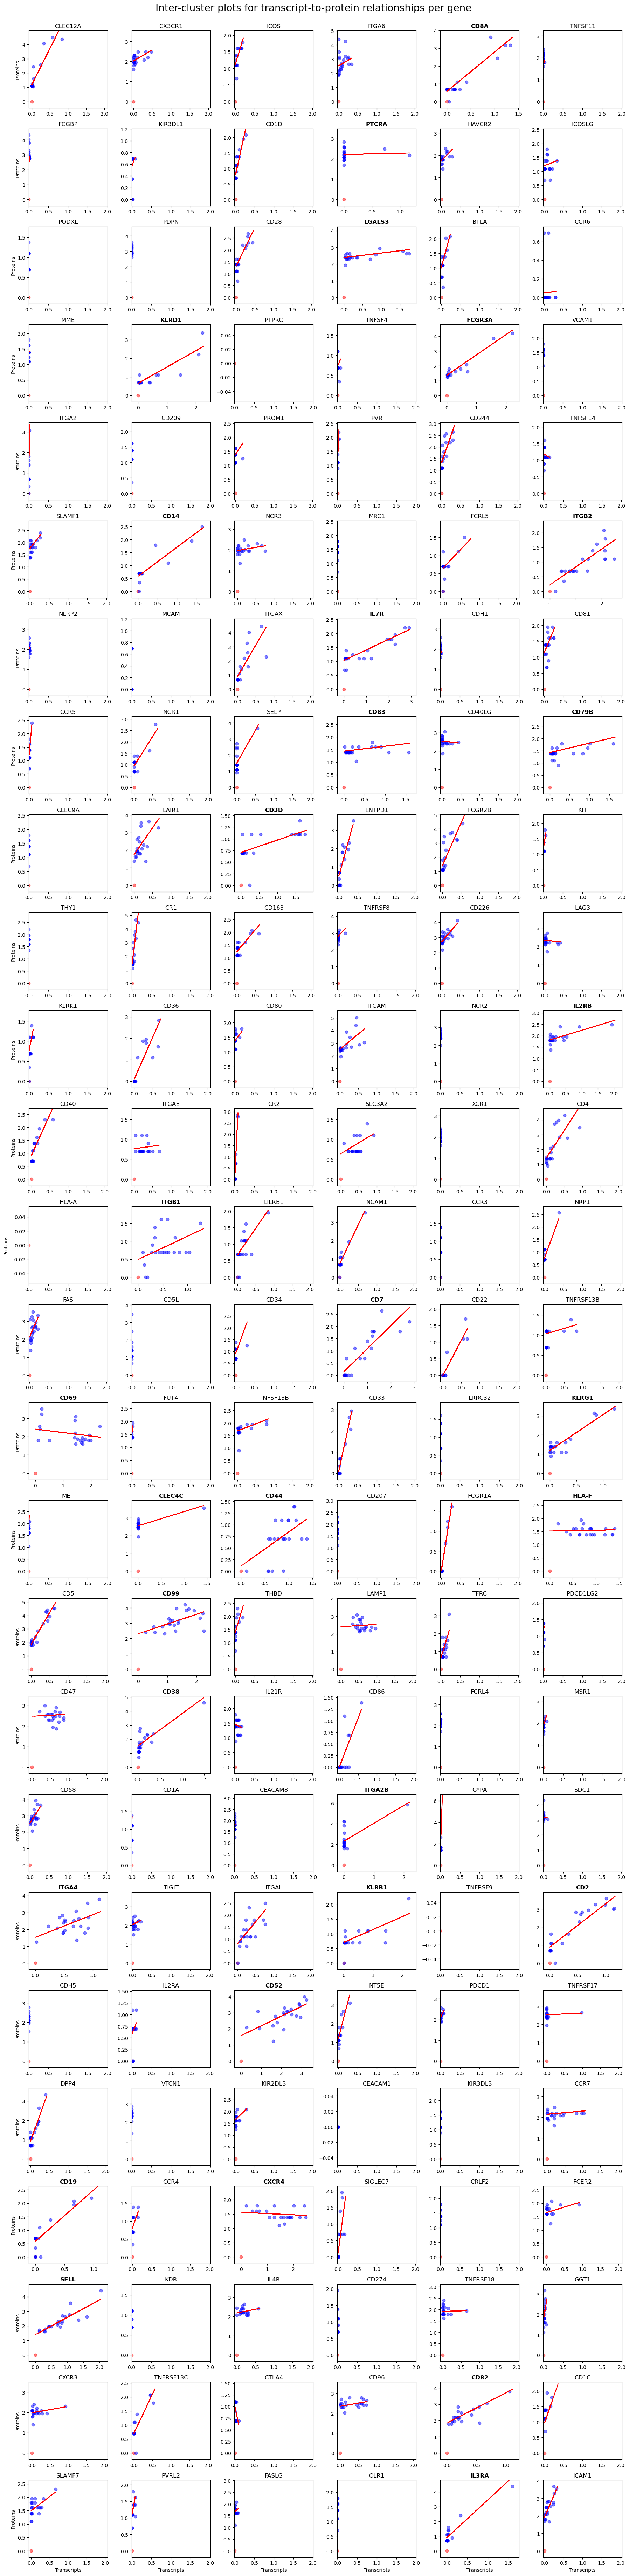

In [31]:
x_ind, y_ind=orgMyPlots(len(prots),6)
fig, ax = plt.subplots(nrows=np.max(y_ind)+1, ncols=np.max(x_ind)+1, figsize=(18, 15*np.array(x_ind).max()))
r_vals=[]
p_vals=[]
slopes=[]
intercepts=[]
max_transcripts=[]

for j, prot in enumerate(prots):
    #try:
    points=pd.DataFrame({"x": averagedMatrix_rna[prot].values, "y":averagedMatrix_prot[prot].values})
    points.dropna(inplace=True,how='any',axis=0)
    zeros=pd.DataFrame([{'x':0, 'y':0}])
    points=pd.concat([points,zeros], axis=0)
    points.reset_index(inplace=True, drop=True)
    try:
        res=stats.linregress(points['x'], points['y'])
        slopes.append(res.slope)
        intercepts.append(res.intercept)
        r_vals.append(res.rvalue)
        p_vals.append(res.pvalue)
        
    except:
        slopes.append(np.nan)
        intercepts.append(np.nan)
        r_vals.append(np.nan)
        p_vals.append(np.nan)
    if(y_ind[j]==np.max(y_ind)):
        ax[y_ind[j],x_ind[j]].set_xlabel("Transcripts")
    if(x_ind[j]==0):
        ax[y_ind[j],x_ind[j]].set_ylabel("Proteins")
        
        
    if(points['x'].max()>np.log1p(2)):
        ax[y_ind[j],x_ind[j]].set_title(prot, fontweight='bold')
        max_x=points['x'].max()
    else:
        ax[y_ind[j],x_ind[j]].set_title(prot)
        max_x=2
        
    try:
        paddingx=points['x'].max()/10
        paddingy=points['y'].max()/10
        ax[y_ind[j],x_ind[j]].set_xlim(0-paddingx,max_x+paddingx)
        ax[y_ind[j],x_ind[j]].set_ylim(0-paddingy,averagedMatrix_prot[prot].max()+paddingy)
    except:
        pass
    
    ax[y_ind[j],x_ind[j]].scatter(0, 0, alpha=0.5, c='r')
    for i, txt in enumerate(cellTypes):
        ax[y_ind[j],x_ind[j]].scatter(averagedMatrix_rna[prot].values[i], averagedMatrix_prot[prot].values[i], alpha=0.5, color='b')
    ax[y_ind[j],x_ind[j]].plot(points['x'].values,res.intercept+res.slope*points['x'], c='r')
            #ax[y_ind[i],x_ind[i]].annotate(txt, (averagedMatrix_rna[prot].values[i], averagedMatrix_prot[prot].values[i]))
    #except:
        #continue
    max_transcripts.append(points['x'].max())
        
#fig.colorbar()
fig.suptitle("Inter-cluster plots for transcript-to-protein relationships per gene", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
fig.savefig("Inter-cluster.png")

regressResults=pd.DataFrame({"Gene": prots, "Slope": slopes, "Intercept": intercepts, "R-Value": r_vals, "P-Value": p_vals, "Max_Transcripts": max_transcripts})
regressResults.to_excel("Regression_Results.xlsx")

In [ ]:
display(regressResults)

In [12]:
points=[]
for j, prot in enumerate(prots):
    prot_points=pd.DataFrame({"Gene": prot, "x_median": averagedMatrix_rna[prot].clip(lower=0), "x_mean": averagedMatrix_rna_means[prot].clip(lower=0), "y_median":averagedMatrix_prot[prot].clip(lower=0), "y_mean":averagedMatrix_prot_means[prot].clip(lower=0)})
    prot_points.dropna(inplace=True,how='any',axis=0)
    points.append(prot_points)

points=pd.concat(points)
display(points)

,Gene,x_median,x_mean,y_median,y_mean
CD14_mono-b1,CLEC12A,0.334289,0.375338,4.060443,3.715596
B_naive-b1,CLEC12A,0.009150,0.017604,1.098612,1.080722
RBC-b1,CLEC12A,0.050267,0.157285,1.609438,1.875508
NK_16hi-b1,CLEC12A,0.014250,0.019202,1.098612,1.083774
CD8.TE-b1,CLEC12A,0.009068,0.011322,1.098612,1.134117
...,...,...,...,...,...
MAIT-b3,ICAM1,0.043033,0.042639,2.397895,2.306485
CD8.Naive-b3,ICAM1,0.005941,0.006792,1.791759,1.853559
NK_56hi-b3,ICAM1,0.226442,0.260582,2.705823,2.689752
pDC-b3,ICAM1,0.351083,0.388749,3.481122,3.454352


## Save all 3 batches inter-cluster points

In [14]:
points.to_excel("Inter-cluster_points.xlsx")

## Filter gene regressions based on R values and number of transcripts

In [ ]:
'''filtered_results=regressResults.loc[(regressResults["Max_Transcripts"]>=2) & (regressResults["R-Value"]>=0.5)].copy()
filtered_results.reset_index(inplace=True, drop=True)
display(filtered_results)'''

## Comparing slopes obtained from inter-cluster regression to slopes obtained from bulk-cell ML regression

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, HuberRegressor, TheilSenRegressor, QuantileRegressor
from sklearn.preprocessing import StandardScaler

def create_transcript_protein_df(adata, prot_name):
    # Construct keys for RNA and protein
    rna_key = rna_prefix + prot_name
    prot_key = prot_prefix + prot_name
    
    # Check if the keys exist in the RNA and protein data
    if rna_key not in adata_rna.var.index or prot_key not in adata_prot.var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
    
    # Get DataFrames for RNA and protein data
    #rna_df = adata_rna.to_df()
    #prot_df = adata_prot.to_df()
    
    adata_rna_copy = adata_rna.copy()
    adata_rna_copy.var.index = [remove_prefix(var, rna_prefix) for var in adata_rna.var.index]
    adata_rna_copy.obs.index = [remove_prefix(obs, rna_prefix) for obs in adata_rna.obs.index]

    adata_prot_copy = adata_prot.copy()
    adata_prot_copy.var.index = [remove_prefix(var, prot_prefix) for var in adata_prot.var.index]
    adata_prot_copy.obs.index = [remove_prefix(obs, prot_prefix) for obs in adata_prot.obs.index]
    
    rna_df=pd.DataFrame(adata_rna.layers["pre_norm"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)
    prot_df=pd.DataFrame(adata_prot.layers["pre_norm"].toarray(), index=adata_prot.obs_names, columns=adata_prot.var_names)

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        
        # Append transcript value from RNA data
        transcripts.append(rna_df.loc[cell, rna_key])
        
        # Append protein value from protein data if cell exists in prot_df
        prot_cell="prot:"+cell.split('rna:')[1]
        if prot_cell in prot_df.index:
            protAmounts.append(prot_df.loc[prot_cell, prot_key])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

# Usage example:
for prot in filtered_results["Gene"]:
    try:
        df = create_transcript_protein_df(adata, prot)
        df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)

        # Filter out rows with zero transcript values
        #df = df.loc[df["Transcripts"] != 0].copy()

        display(df.describe())
        plt.figure(figsize=(6,8))
        plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.05, c=list(df['cell_type'].cat.codes), cmap='tab20', label="Cells")
        
        slope=filtered_results.loc[filtered_results["Gene"]==prot, "Slope"].values[0]
        intercept=filtered_results.loc[filtered_results["Gene"]==prot, "Intercept"].values[0]
        r_val=filtered_results.loc[filtered_results["Gene"]==prot, "R-Value"].values[0]
        
        plt.plot(df["Transcripts"], intercept+(slope*df["Transcripts"]), c='r', label=f"Inter-cluster slope (r={r_val:.2f})")
        #plt.hist2d(df["Transcripts"], df["Proteins"], bins=[int(df["Transcripts"].max())+1, int(df["Proteins"].max())+1], cmax=40)
        # Optionally, set y-axis to log scale
        #plt.yscale('log')
        #plt.xscale('log')
        
        models=[TheilSenRegressor(random_state=101), HuberRegressor(epsilon=1), HuberRegressor(epsilon=2), RANSACRegressor(random_state=101, residual_threshold=0.15),RANSACRegressor(random_state=101, residual_threshold=0.5)]
        # Standardize
        x_scaler, y_scaler = StandardScaler(), StandardScaler()
        x_train = x_scaler.fit_transform(df["Transcripts"].values.reshape(-1, 1))
        y_train = y_scaler.fit_transform(df["Proteins"].values.reshape(-1, 1))
        model_colors=['--g', '--b', ':b', '--y', ':y']
        for i, model in enumerate(models):
            try:
                model.fit(x_train, y_train.ravel())

                # Do some predictions
                test_x = np.linspace(df["Transcripts"].min(), df["Transcripts"].max(), 100).reshape(-1, 1)
                x_test_scaled = x_scaler.transform(test_x)
                predictions_scaled = model.predict(x_test_scaled)

                # Adjust predictions to have zero intercept in original scale
                predictions = y_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))

                plt.plot(test_x, predictions, model_colors[i], label=str(model))

            except ValueError as e:  # as e syntax added in ~python2.5
                if str(e) == "HuberRegressor convergence failed: l-BFGS-b solver terminated with ABNORMAL_TERMINATION_IN_LNSRCH":
                    pass
                else:
                    raise(e)
        medians_x=[]
        medians_y=[]
        
        upper_quar=[]
        lower_quar=[]
        for t_num in df["Transcripts"].unique():
            if(len(df.loc[df["Transcripts"]==t_num,"Proteins"])>=5): # if more than 5 cells
                medians_x.append(t_num)
                medians_y.append(df.loc[df["Transcripts"]==t_num,"Proteins"].median())
                upper_quar.append(df.loc[df["Transcripts"]==t_num,"Proteins"].median()+np.percentile(df.loc[df["Transcripts"]==t_num,"Proteins"],0.25))
                lower_quar.append(df.loc[df["Transcripts"]==t_num,"Proteins"].median()-np.percentile(df.loc[df["Transcripts"]==t_num,"Proteins"],0.25))
        plt.scatter(medians_x, medians_y, c='k', alpha=0.8,edgecolors='w', label="Medians")
        quar_df=pd.DataFrame({"X":medians_x, "Upper":upper_quar, "Lower":lower_quar})
        quar_df=quar_df.sort_values(by='X', ascending=True)
        plt.fill_between(quar_df["X"],quar_df["Upper"], quar_df["Lower"], color='grey', alpha=0.5, interpolate=True)
        
        plt.xlabel("Transcripts")
        plt.ylabel("Proteins")
        #plt.xlim(0,35)
        plt.ylim(0,100)
        plt.legend(bbox_to_anchor=(0,-0.1), loc='upper left', fontsize='x-small')
        plt.tight_layout()
        plt.title(prot)
        plt.show()
    except Exception as e:
        raise (e)
'''

## Get FASTA sequence of all filtered genes as well as genes not represented in Antibody Capture

In [ ]:
from PyBioMed.PyGetMol import GetProtein
from Bio import SeqIO
from PyBioMed import Pyprotein
cell_locations=pd.read_csv("/kaggle/input/protein-locations/subcellular_location.tsv", sep='\t', header=0)
cell_locations = cell_locations.dropna(subset=["Main location"])
cell_locations = cell_locations[cell_locations["Main location"].str.contains("Plasma membrane")]

surf_markers=list(cell_locations["Gene name"])
surf_markers.append("CD19")
surf_markers.append("TNFRSF17")
print(len(surf_markers))

geneList=list(filtered_results["Gene"])
colors=list(filtered_results["Slope"])

for m in surf_markers:
    if "rna:"+m in adata_rna.var.index.values:
        geneList.append(m)
        colors.append(np.nan)
print(len(geneList))

'''GetProtein.GetPDB([x.lower() for x in geneList])
seq=GetProtein.GetSeqFromPDB([x.lower()+".pdb" for x in geneList])
print(len(seq))'''


protein="ADGCGVGEGTGQGPMCNCMCMKWVYADEDAADLESDSFADEDASLESDSFPWSNQRVFCSFADEDAS"
protein_class = Pyprotein.PyProtein(protein)
#protein_class.GetCTD()
'''print(dir(list(SeqIO.parse("/kaggle/input/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"))[0]))
print((list(SeqIO.parse("/kaggle/input/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"))[0]).name)'''
fastaList=[]
fastaGenes=[]
for record in SeqIO.parse("/kaggle/input/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"):
    org=record.name.split("|")[2].split("_")[1]
    try:
        gene=record.description.split("GN=")[1].split(" ")[0]
    except:
        gene=record.name.split("|")[2].split("_")[0]
    if(org == "HUMAN" and gene in geneList):
        fastaList.append(record.seq)
        fastaGenes.append(gene)

### To know if any genes weren't found in FASTA file

In [ ]:
set(filtered_results["Gene"])-set(fastaGenes)

### Compile into a dataframe to be UMAPed

In [ ]:
len(fastaGenes)
fastaColors=[]

for fastaGene in fastaGenes:
    fastaColors.append(colors[geneList.index(fastaGene)])
fasta_df=pd.DataFrame({"Genes":fastaGenes, "Fasta": fastaList, "Slopes": fastaColors})
display(fasta_df)
fasta_df.to_excel("Fasta_DF.xlsx")
'''protein_class = Pyprotein.PyProtein(fastaList[0])
protein_class.GetCTD()'''

## UMAP

In [ ]:
'''import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from PyBioMed.PyGetMol import GetProtein
from PyBioMed import Pyprotein

# Load data
df = pd.read_excel("Fasta_DF.xlsx", index_col=0)

# Step 1: Create a list to store the descriptors
descriptors_list = []

# Step 2: Iterate over each row
for index, row in df.iterrows():
    # Step 3: Calculate the descriptors
    protein_class = Pyprotein.PyProtein(row['Fasta'])
    descriptors = protein_class.GetDPComp()
    
    # Step 4: Add the descriptors to the list
    descriptors_list.append(descriptors)

# Step 5: Convert the list of descriptors to a DataFrame
descriptor_df = pd.DataFrame(descriptors_list)

# Step 6: Concatenate the original DataFrame with the descriptor DataFrame
result_df = pd.concat([df, descriptor_df], axis=1)

# Step 1: Apply UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(descriptor_df)

# Step 2: Handle NaN values in the Colors column
color_column = result_df['Slopes']
max_positive_value = color_column[color_column > 0].max()
color_column_filled = color_column.fillna(-max_positive_value)

# Log-transform the non-NaN values
log_colors = np.log1p(color_column_filled - color_column_filled.min() + 1)

# Normalize the log-transformed color values
norm = plt.Normalize(vmin=log_colors.min(), vmax=log_colors.max())

# Create an array of colors, with NaN values replaced by grey
colors = np.array([plt.cm.winter(norm(x)) if not pd.isna(x) else (0.8, 0.8, 0.8, 1.0) for x in color_column])

# Step 3: Plot the UMAP result
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    edgecolor='k',
    linewidth=0.1,
    alpha=0.8
)

# Adding the colorbar for log-transformed values (excluding NaNs)
sm = plt.cm.ScalarMappable(cmap='winter', norm=norm)
sm.set_array(log_colors[~pd.isna(color_column_filled)])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Log Colors')

plt.title('UMAP Projection with Color Mapping')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()
'''

In [ ]:
'''plt.hist(sums, bins=20)
plt.show()'''

## RTP prediction using generated pseudolabels

### Inputs and outputs

In [ ]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from PyBioMed.PyGetMol import GetProtein
from PyBioMed import Pyprotein
from sklearn.feature_selection import VarianceThreshold

def get_fasta(geneList):
    fastaList=[]
    fastaGenes=[]

    for record in SeqIO.parse("/kaggle/input/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"):
        org=record.name.split("|")[2].split("_")[1]
        try:
            gene=record.description.split("GN=")[1].split(" ")[0]
        except:
            gene=record.name.split("|")[2].split("_")[0]
        if(org == "HUMAN" and gene in geneList):
            fastaList.append(record.seq)
            fastaGenes.append(gene)
    return fastaGenes, fastaList

def get_gene_Xy_slopes(geneList, descriptorType):
    fastaGenes, fastaList=get_fasta(geneList)

    descriptors_list = []
    y=[]

    for gene in fastaGenes:
        y.append(filtered_results.loc[filtered_results["Gene"]==gene, "Slope"].values[0])


    # Step 2: Iterate over each row
    if(descriptorType=='GetCTD'):
        for i, fasta_entry in enumerate(fastaList):
            protein_class = Pyprotein.PyProtein(fasta_entry)
            descriptors = protein_class.GetCTD()
            descriptors_list.append(descriptors)
    elif(descriptorType=='GetDPComp'):
        for i, fasta_entry in enumerate(fastaList):
            protein_class = Pyprotein.PyProtein(fasta_entry)
            descriptors = protein_class.GetDPComp()
            descriptors_list.append(descriptors)
    '''selector=VarianceThreshold(0.5)
    X=selector.fit_transform(X)'''

    # Step 5: Convert the list of descriptors to a DataFrame
    X = pd.DataFrame(descriptors_list, index=fastaGenes)
    display(X)
    display(y)
    return X,y

def augment_points_Xy(X, geneRegress, desired_size):
    #augX=pd.DataFrame(np.nan, columns=X.columns, index=[])
    augX=[]
    augy=[]
    transcripts_list=[]
    for i, gene in enumerate(X.index): # for each gene
        new_points_count=int(np.ceil(desired_size/len(X.index)))
        transcripts=np.linspace(0, geneRegress.loc[gene, "Max_Transcripts"], new_points_count)
        intercept=geneRegress.loc[gene, "Intercept"]
        slope=geneRegress.loc[gene, "Slope"]
        proteins=intercept+slope*transcripts
        for j in range(new_points_count): # create new points
            #transcripts_inc=j*regressionResults.loc[gene, "Max_Transcripts"]/new_points_count
            #transcripts=range(0, regressionResults.loc[gene, "Max_Transcripts"], transcripts_inc)
            augX.append(X.loc[gene])
            transcripts_list.append(transcripts[j])
            augy.append(proteins[j])
    augX=pd.DataFrame(augX, columns=X.columns)
    augX["Transcripts"]=transcripts_list  
    return augX, augy

For having descriptors as inputs and slopes as outputs

In [ ]:
filtered_results=regressResults.loc[(regressResults["Max_Transcripts"]>2)].copy()
filtered_results.reset_index(inplace=True, drop=True)
geneList=filtered_results["Gene"].values
X,y=get_gene_Xy_slopes(geneList, 'GetDPComp')

For having descriptors and number of transcripts as inputs and protein levels as outputs for select genes we're confident in using data augmentation

In [ ]:
geneList

In [ ]:
regressResults_indexed=regressResults.set_index("Gene")
top_genes_X=X.loc[["IL7R", "CD7", "FCGR3A"]].copy()
mid_genes_X=X.loc[["KLRD1", "CD14"]].copy()
X1,y1=augment_points_Xy(top_genes_X, regressResults_indexed, 150)
X2,y2=augment_points_Xy(mid_genes_X, regressResults_indexed, 50)
X=pd.concat([X1, X2], ignore_index=True)
y=y1
y.extend(y2)

display(X)
display(y)

augmented_df=X.copy()
augmented_df["Proteins"]=y
augmented_df.to_excel("Lane3_Augmented.xlsx")

Getting all points from all inter-cluster scatter plots

In [ ]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from PyBioMed.PyGetMol import GetProtein
from PyBioMed import Pyprotein
from sklearn.feature_selection import VarianceThreshold

def get_Xy_points(geneList, descriptorType):
    fastaGenes, fastaList=get_fasta(geneList)

    descriptors_list = []
    point_descriptors = []
    proteins=[]
    transcripts=[]

    # Step 2: Iterate over each row
    if(descriptorType=='GetCTD'):
        for i, fasta_entry in enumerate(fastaList):
            protein_class = Pyprotein.PyProtein(fasta_entry)
            descriptors = protein_class.GetCTD()
            descriptors_list.append(descriptors)
    elif(descriptorType=='GetDPComp'):
        for i, fasta_entry in enumerate(fastaList):
            protein_class = Pyprotein.PyProtein(fasta_entry)
            descriptors = protein_class.GetDPComp()
            descriptors_list.append(descriptors)
    print(len(descriptors_list))
    for j, prot in enumerate(fastaGenes):
        
        xy_filtered=pd.DataFrame({"x": averagedMatrix_rna[prot].values, "y":averagedMatrix_prot[prot].values})
        xy_filtered.dropna(inplace=True,how='any',axis=0)

        for i in range(len(xy_filtered.index)):
            point_descriptors.append(descriptors_list[j])
            transcripts.append(xy_filtered['x'].values[i])
            proteins.append(xy_filtered['y'].values[i])

    points=pd.DataFrame(point_descriptors)
    points["Transcripts"]=transcripts
    
    return points, proteins


X_test, y_test=get_Xy_points(["CD7", "IL7R"], 'GetDPComp')
display(X_test)
display(y_test)

In [ ]:
test_genes=set(prots)-set(["IL7R", "CD7", "FCGR3A"])-set(["KLRD1", "IL2RB"])
X_test, y_test=get_Xy_points(test_genes, 'GetDPComp')
display(X_test)
display(y_test)

augmented_df=X_test.copy()
augmented_df["Proteins"]=y_test
augmented_df.to_excel("Lane3_Low_Transcript_Genes.xlsx")

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

DT_params={"max_depth": [2, 3, 4, 5],
       "min_samples_split":[1, 2, 3],
       "min_samples_leaf":[1, 2, 3, 4, 5, 6],
       "max_features":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "splitter": ['best', 'random']}

DT=DecisionTreeRegressor(random_state=101)
DT_GSCV=GridSearchCV(DT, DT_params,scoring='max_error')
DT_GSCV.fit(X, y)

In [ ]:
DT_pred=DT_GSCV.best_estimator_.predict(X_test)
print(DT_GSCV.best_score_)
print(DT_GSCV.best_params_)
pd.DataFrame({"True":y_test,"Pred":DT_pred})

In [ ]:
imp=pd.DataFrame([X.columns,DT_GSCV.best_estimator_.feature_importances_])
imp=imp.T
imp.columns=["Feature", "Importance"]
imp.loc[imp["Importance"]>0]

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, DT_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(DT_pred), max(y_test))
p2 = min(min(DT_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF_params={"max_depth": [2, 3, 4, 5],
       "min_samples_split":[1, 2, 3],
       "min_samples_leaf":[1, 2, 3, 4, 5, 6],
       "max_features":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

RF=RandomForestRegressor(random_state=101)
RF_GSCV=GridSearchCV(RF, RF_params,scoring='max_error')
RF_GSCV.fit(X, y)

In [ ]:
RF_pred=RF_GSCV.best_estimator_.predict(X_test)
print(RF_GSCV.best_score_)
print(RF_GSCV.best_params_)
pd.DataFrame({"True":y_test,"Pred":RF_pred})

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, RF_pred, c='crimson', alpha=0.1)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(RF_pred), max(y_test))
p2 = min(min(RF_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
imp=pd.DataFrame([X.columns,RF_GSCV.best_estimator_.feature_importances_])
imp=imp.T
imp.columns=["Feature", "Importance"]
imp.loc[imp["Importance"]>0]

In [ ]:
imp.loc[imp["Importance"]>0].copy().to_excel("RandomForestImportances.xlsx")

### Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Lasso_params={"alpha":[0.1, 0.5, 1, 5, 10, 50, 100],
       "fit_intercept": [True, False],
       "tol":[1e-6,1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 10]}

Lasso=Lasso()
Lasso_GSCV=GridSearchCV(Lasso, Lasso_params,scoring='explained_variance')
Lasso_GSCV.fit(X, y)

In [ ]:
Lasso_pred=Lasso_GSCV.best_estimator_.predict(X_test)
print(Lasso_GSCV.best_score_)
print(Lasso_GSCV.best_params_)
pd.DataFrame({"True":y_test,"Pred":Lasso_pred})

In [ ]:
Lasso_GSCV.best_score_

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Lasso_pred, c='crimson', alpha=0.1)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Lasso_pred), max(y_test))
p2 = min(min(Lasso_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Ridge_params={"alpha":[0.1, 0.5, 1, 5, 10, 50, 100],
       "fit_intercept": [True, False],
       "tol":[1e-6,1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 10],
       "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

Ridge=Ridge()
Ridge_GSCV=GridSearchCV(Ridge, Ridge_params,scoring='explained_variance')
Ridge_GSCV.fit(X, y)

In [ ]:
Ridge_pred=Ridge_GSCV.best_estimator_.predict(X_test)
print(Ridge_GSCV.best_score_)
print(Ridge_GSCV.best_params_)
pd.DataFrame({"True":y_test,"Pred":Ridge_pred})

In [ ]:
Ridge_GSCV.best_score_

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Ridge_pred, c='crimson', alpha=0.1)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Ridge_pred), max(y_test))
p2 = min(min(Ridge_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Two-Stage Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

DT_params={"max_depth": [2, 3, 4, 5],
       "min_samples_split":[1, 2, 3],
       "min_samples_leaf":[1, 2, 3, 4, 5, 6],
       "max_features":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "splitter": ['best', 'random']}

DT=DecisionTreeRegressor(random_state=101, warm_start=True)

# Stage 1 - train on fake data


# Stage 2
DT_GSCV=GridSearchCV(DT, DT_params,scoring='max_error')
DT_GSCV.fit(X, y)

### Box plot

## Intra-cluster RTP differences per gene

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cell_t = "CD14_mono"
ind=adata_rna.obs['cell_type']==cell_t
cell_adata_rna = adata_rna[ind].copy()
cell_adata_prot = adata_prot[ind].copy()

def create_transcript_protein_df(prot_name):
    # Construct keys for RNA and protein
    rna_key = rna_prefix + prot_name
    prot_key = prot_prefix + prot_name
    
    # Check if the keys exist in the RNA and protein data
    if rna_key not in cell_adata_rna.var.index or prot_key not in cell_adata_prot.var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
    
    # Get DataFrames for RNA and protein data
    #rna_df = cell_adata_rna.to_df()
    #prot_df = cell_adata_prot.to_df()
    
    adata_rna_copy = cell_adata_rna.copy()
    adata_rna_copy.var.index = [remove_prefix(var, rna_prefix) for var in cell_adata_rna.var.index]
    adata_rna_copy.obs.index = [remove_prefix(obs, rna_prefix) for obs in cell_adata_rna.obs.index]

    adata_prot_copy = cell_adata_prot.copy()
    adata_prot_copy.var.index = [remove_prefix(var, prot_prefix) for var in cell_adata_prot.var.index]
    adata_prot_copy.obs.index = [remove_prefix(obs, prot_prefix) for obs in cell_adata_prot.obs.index]
    
    rna_df=pd.DataFrame(cell_adata_rna.layers["pre_norm"].toarray(), index=cell_adata_rna.obs_names, columns=cell_adata_rna.var_names)
    prot_df=pd.DataFrame(cell_adata_prot.layers["pre_norm"].toarray(), index=cell_adata_prot.obs_names, columns=cell_adata_prot.var_names)

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        
        # Append transcript value from RNA data
        transcripts.append(rna_df.loc[cell, rna_key])
        
        # Append protein value from protein data if cell exists in prot_df
        prot_cell="prot:"+cell.split('rna:')[1]
        if prot_cell in prot_df.index:
            protAmounts.append(prot_df.loc[prot_cell, prot_key])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

# Usage example:
for prot in prots:
    try:
        df = create_transcript_protein_df(prot)

        # Filter out rows with zero transcript values
        #df = df.loc[df["Transcripts"] != 0].copy()

        display(df.describe())
        plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.1)
        # Optionally, set y-axis to log scale
        #plt.yscale('log')
        #plt.xscale('log')
        plt.xlabel("Transcripts")
        plt.ylabel("Proteins")
        #plt.xlim(0,20)
        plt.ylim(0,100)
        plt.title(prot)
        plt.show()
    except Exception as e:
        raise e


### Scatter plot

### Box plot

In case of no prefixes

In [ ]:
adata_rna.obs

In [ ]:
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = pd.DataFrame(adata_rna.layers["pre_log"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)
cellMatrix['cell_type'] = adata_rna.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
averagedMatrix=pd.DataFrame()
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix=averagedMatrix.append(conditional_non_zero_median_df(temp_df), ignore_index=True) # averaging uses conditional non zero median of cell counts
    sums.append(adata_rna.obs.loc[adata_rna.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix.index=cellTypes

In [ ]:
averagedMatrix

For all cells

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_transcript_protein_df(adata, prot_name):
    # Check if the keys exist in the RNA and protein data
    if prot_name not in adata.mod['rna'].var.index or prot_name not in adata.mod['prot'].var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
    
    # Get DataFrames for RNA and protein data
    rna_df = adata.mod['rna'].to_df()
    prot_df = adata.mod['prot'].to_df()

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        # Append transcript value from RNA data
        transcripts.append(rna_df.loc[cell, prot_name])
        
        # Append protein value from protein data if cell exists in prot_df
        if cell in prot_df.index:
            protAmounts.append(prot_df.loc[cell, prot_name])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

# Usage example:
#prot = "CD88"
for prot in prots:
    try:
        df = create_transcript_protein_df(adata, prot)

        # Filter out rows with zero transcript values
        df = df.loc[df["Transcripts"] != 0].copy()

        display(df.describe())
        plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.4)
        # Optionally, set y-axis to log scale
        plt.yscale('log')
        plt.xlabel("Transcripts")
        plt.ylabel("Proteins")
        plt.xlim(0,6)
        plt.title(prot)
        plt.show()
    except Exception as e:
        print(e)


For all cell types

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_transcript_protein_df(adata, prot_name):
    # Check if the keys exist in the RNA and protein data
    if prot_name not in adata.mod['rna'].var.index or prot_name not in adata.mod['prot'].var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
    
    # Get DataFrames for RNA and protein data
    rna_df = adata.mod['rna'].to_df()
    prot_df = adata.mod['prot'].to_df()

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        # Append transcript value from RNA data
        transcripts.append(rna_df.loc[cell, prot_name])
        
        # Append protein value from protein data if cell exists in prot_df
        if cell in prot_df.index:
            protAmounts.append(prot_df.loc[cell, prot_name])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

# Usage example:
#prot = "CD88"
for prot in prots:
    try:
        df = create_transcript_protein_df(adata, prot)

        # Filter out rows with zero transcript values
        df = df.loc[df["Transcripts"] != 0].copy()

        display(df.describe())
        plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.4)
        # Optionally, set y-axis to log scale
        plt.yscale('log')
        plt.xlabel("Transcripts")
        plt.ylabel("Proteins")
        plt.xlim(0,6)
        plt.title(prot)
        plt.show()
    except Exception as e:
        print(e)


# Define a list of proteins that are considered surface markers

In [ ]:
cell_locations=pd.read_csv("/kaggle/input/protein-locations/subcellular_location.tsv", sep='\t', header=0)
display(cell_locations)
cell_locations = cell_locations.dropna(subset=["Main location"])
cell_locations = cell_locations[cell_locations["Main location"].str.contains("Plasma membrane")]

surf_markers=list(cell_locations["Gene name"])
surf_markers.append("CD19")
surf_markers.append("TNFRSF17")
print(surf_markers)

# Histograms: Conditional Median and Weighted Median

In [ ]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

# finding upregulated proteins in scRNA-seq. Lupus biomarkers adopted from https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2022.941221/full
upregProts_literature=['RSAD2', 'IFIT3', 'APOBEC3A', 'IFIT2', 'PARP9', 'DTX3L', 'PLSCR1', 'IFI35', 'ISG15', 'CMPK2', 'HERC5', 'GBP1', 'IFI27', 'STAT1', 'MX1', 'IRF7', 'OAS1', 'OAS2', 'OAS3', 'OASL', 'IFIH1', 'SIGLEC1', 'LGALS9', 'BST2']
upregProts=intersection(prots, adata_rna.var.index)
'''for elem in adata.var.index:
    for p in upregProts:
        if(p == elem):
            print(elem)'''
print("Disease related proteins considered:")
print(upregProts)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upregProt = "CD7"
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = pd.DataFrame(adata_rna.layers["pre_log"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)
cellMatrix['cell_type'] = adata_rna.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
fig, axs = plt.subplots(nrows=len(cellTypes), ncols=1, figsize=(6, 4 * len(cellTypes)))

for i, cell_t in enumerate(cellTypes):
    vals = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, upregProt]
    
    # Assign weights: give a lower weight to zero values
    weights = np.ones_like(vals)
    weights[vals == 0] = zero_weight  # Assign a weight of 0.25 to zero values
    
    axs[i].hist(vals, bins=range(0, 60), color='#226399')
    axs[i].set_title(f"{upregProt} RNA content in {cell_t}")
    axs[i].axvline(weighted_median(vals, weights), color='#D81B60', linestyle='dashed', linewidth=2, label='Weighted Median')
    axs[i].axvline(vals.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Mean')
    axs[i].axvline(vals.median(), color='#FFC107', linestyle='dashed', linewidth=2, label='Median')
    non_zero_median=conditional_non_zero_median(vals, threshold=conditional_threshold)
    if not np.isnan(non_zero_median):
        axs[i].axvline(non_zero_median, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    else:
        axs[i].axvline(0, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel("Number of genes expressions")
    axs[i].set_ylabel("Number of cells")
    axs[i].text(60, 
                0, 
                f"w. median zero weight: {zero_weight:.2f}\ncond. median threshold: {conditional_threshold:.2f}\n", 
                fontsize = 10, 
                bbox = dict(facecolor = 'white', alpha = 0.5),
                horizontalalignment='right',
                verticalalignment='bottom')

plt.tight_layout()
plt.savefig("Mean and Median Modifications - RNA.png")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upregProt = "CD7"
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = adata_prot.to_df()
cellMatrix['cell_type'] = adata_prot.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
fig, axs = plt.subplots(nrows=len(cellTypes), ncols=1, figsize=(6, 4 * len(cellTypes)))

for i, cell_t in enumerate(cellTypes):
    vals = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, upregProt]
    
    # Assign weights: give a lower weight to zero values
    weights = np.ones_like(vals)
    weights[vals == 0] = zero_weight  # Assign a weight of 0.25 to zero values
    
    axs[i].hist(vals, bins=np.linspace(0,10,40), color='#226399')
    axs[i].set_title(f"{upregProt} RNA content in {cell_t}")
    axs[i].axvline(weighted_median(vals, weights), color='#D81B60', linestyle='dashed', linewidth=2, label='Weighted Median')
    axs[i].axvline(vals.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Mean')
    axs[i].axvline(vals.median(), color='#FFC107', linestyle='dashed', linewidth=2, label='Median')
    print(vals.median())
    non_zero_median=conditional_non_zero_median(vals, threshold=conditional_threshold)
    if not np.isnan(non_zero_median):
        axs[i].axvline(non_zero_median, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    else:
        axs[i].axvline(0, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel("Number of genes expressions")
    axs[i].set_ylabel("Number of cells")
    axs[i].text(60, 
                0, 
                f"w. median zero weight: {zero_weight:.2f}\ncond. median threshold: {conditional_threshold:.2f}\n", 
                fontsize = 10, 
                bbox = dict(facecolor = 'white', alpha = 0.5),
                horizontalalignment='right',
                verticalalignment='bottom')

plt.tight_layout()
plt.savefig("Mean and Median Modifications - log Protein.png")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upregProt = "CD7"
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = pd.DataFrame(adata_prot.layers["pre_log"].toarray(), index=adata_prot.obs_names, columns=adata_prot.var_names)
cellMatrix['cell_type'] = adata_prot.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
fig, axs = plt.subplots(nrows=len(cellTypes), ncols=1, figsize=(6, 4 * len(cellTypes)))

for i, cell_t in enumerate(cellTypes):
    vals = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, upregProt]
    
    # Assign weights: give a lower weight to zero values
    weights = np.ones_like(vals)
    weights[vals == 0] = zero_weight  # Assign a weight of 0.25 to zero values
    
    axs[i].hist(vals, bins=range(0, 60), color='#226399')
    axs[i].set_title(f"{upregProt} protein content in {cell_t}")
    axs[i].axvline(weighted_median(vals, weights), color='#D81B60', linestyle='dashed', linewidth=2, label='Weighted Median')
    axs[i].axvline(vals.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Mean')
    axs[i].axvline(vals.median(), color='#FFC107', linestyle='dashed', linewidth=2, label='Median')
    non_zero_median=conditional_non_zero_median(vals, threshold=conditional_threshold)
    if not np.isnan(non_zero_median):
        axs[i].axvline(non_zero_median, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    else:
        axs[i].axvline(0, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel("Number of genes expressions")
    axs[i].set_ylabel("Number of cells")
    axs[i].text(60, 
                0, 
                f"w. median zero weight: {zero_weight:.2f}\ncond. median threshold: {conditional_threshold:.2f}\n", 
                fontsize = 10, 
                bbox = dict(facecolor = 'white', alpha = 0.5),
                horizontalalignment='right',
                verticalalignment='bottom')

plt.tight_layout()
plt.savefig("Mean and Median Modifications - Protein.png")
plt.show()
